In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
CHANNELS=3


In [3]:
train_path = '../HAM dataset/synthetic2/train_final'
test_path = '../HAM dataset/synthetic2/test'
val_path = '../HAM dataset/synthetic2/val'

In [4]:
vgg = VGG19(input_shape=IMAGE_SIZE + [CHANNELS], weights='imagenet', include_top=False)

In [5]:
from keras import regularizers
for layer in vgg.layers:
  layer.trainable = False
  if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = regularizers.l1(0.01)

In [6]:
folders = glob('../HAM dataset/synthetic2/train_final/*')
folders

['../HAM dataset/synthetic2/train_final\\Acne and Rosacea Photos',
 '../HAM dataset/synthetic2/train_final\\akiec',
 '../HAM dataset/synthetic2/train_final\\bcc',
 '../HAM dataset/synthetic2/train_final\\bkl',
 '../HAM dataset/synthetic2/train_final\\df',
 '../HAM dataset/synthetic2/train_final\\Eczema Photos',
 '../HAM dataset/synthetic2/train_final\\healthy',
 '../HAM dataset/synthetic2/train_final\\mel',
 '../HAM dataset/synthetic2/train_final\\nv',
 '../HAM dataset/synthetic2/train_final\\vasc']

In [7]:

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)
# train_datagen = train_datagen.prefetch(buffer_size=tf.data.AUTOTUNE)


test_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.5,
                                   horizontal_flip = True)
# test_datagen = test_datagen.prefetch(buffer_size=tf.data.AUTOTUNE)

testing_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.5,
                                   horizontal_flip = True)
# testing_datagen = testing_datagen.prefetch(buffer_size=tf.data.AUTOTUNE)



training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

testing_set=testing_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

                                            
def data_generator(image_data_gen):
    for x, y in image_data_gen:
        yield x, y

dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(testing_set),
    (tf.float32, tf.float32),
    (tf.TensorShape([None, 224, 224, 3]), tf.TensorShape([None, 10]))
)

# '''r=model.fit_generator(training_set,
#                          samples_per_epoch = 8000,
#                          nb_epoch = 5,
#                          validation_data = test_set,
#                          nb_val_samples = 2000)'''


Found 28819 images belonging to 10 classes.
Found 9613 images belonging to 10 classes.
Found 12815 images belonging to 10 classes.


In [5]:
class_names=training_set.class_indices
# class_names=class_names.keys()
class_names

{'Acne and Rosacea Photos': 0,
 'Eczema Photos': 1,
 'akiec': 2,
 'bcc': 3,
 'bkl': 4,
 'df': 5,
 'healthy': 6,
 'mel': 7,
 'nv': 8,
 'vasc': 9}

In [13]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


r = model.fit_generator(
        training_set,
        validation_data=test_set,
        epochs=25,
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set),
        callbacks=[early_stopping]
        
    )


Epoch 1/25


C:\Users\RAHUL NAIR\AppData\Local\Temp\ipykernel_172644\66669358.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


1802/1802 [==============================] - 344s 185ms/step - loss: 1.7006 - accuracy: 0.4488 - val_loss: 1.7990 - val_accuracy: 0.4812
Epoch 2/25
1802/1802 [==============================] - 342s 190ms/step - loss: 1.5556 - accuracy: 0.5113 - val_loss: 1.5348 - val_accuracy: 0.5277
Epoch 3/25
1802/1802 [==============================] - 356s 198ms/step - loss: 1.4875 - accuracy: 0.5444 - val_loss: 1.6685 - val_accuracy: 0.5084
Epoch 4/25
1802/1802 [==============================] - 318s 176ms/step - loss: 1.4410 - accuracy: 0.5551 - val_loss: 1.4190 - val_accuracy: 0.5403
Epoch 5/25
1802/1802 [==============================] - 490s 272ms/step - loss: 1.4395 - accuracy: 0.5590 - val_loss: 1.9859 - val_accuracy: 0.5006
Epoch 6/25
1802/1802 [==============================] - 300s 167ms/step - loss: 1.4149 - accuracy: 0.5739 - val_loss: 1.5895 - val_accuracy: 0.5655
Epoch 7/25
1802/1802 [==============================] - ETA: 0s - loss: 1.4250 - accuracy: 0.5740

In [27]:
model.evaluate(testing_set)

801/801 [==============================] - 101s 125ms/step - loss: 1.3177 - accuracy: 0.5788


[1.3177146911621094, 0.5787748694419861]

In [28]:
acc=r.history["accuracy"]
val_acc=r.history["val_accuracy"]
loss=r.history["loss"]
val_loss=r.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Loss')

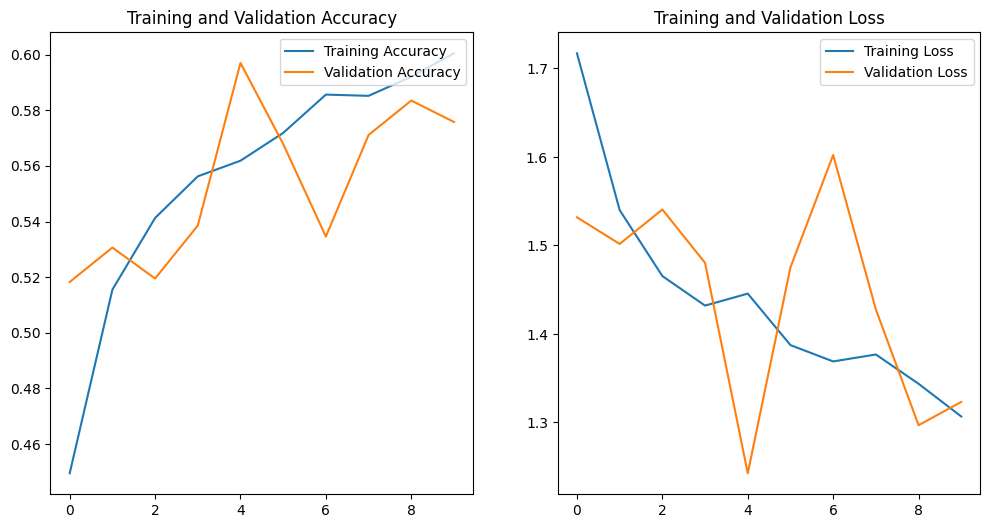

In [29]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

In [35]:
import tensorflow as tf
from keras.models import load_model
tf.saved_model.save(model,"../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60acc")

#model.save('../models/model_v5_resnetl.h5')

INFO:tensorflow:Assets written to: ../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60acc\assets


INFO:tensorflow:Assets written to: ../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60acc\assets


In [31]:
model.save("../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60acc.h5")

In [36]:
model.save("../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60accuracy")

INFO:tensorflow:Assets written to: ../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60accuracy\assets


INFO:tensorflow:Assets written to: ../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60accuracy\assets


In [32]:
saved_model_dir="../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60acc"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
with open('../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60acc.tflite', 'wb') as f:
  f.write(tflite_model)

In [14]:
model=tf.saved_model.load("../models/model_v6_resnet_tf_augmented_12d")
infer = model.signatures["serving_default"]

In [71]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x208969c5d00>

In [10]:

import tensorflow as tf
dataset_test=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/RAHUL NAIR/Documents/all folders/Project folder/HAM dataset/synthetic2/test",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size=16

)

Found 12815 files belonging to 10 classes.


In [7]:
class_names=dataset_test.class_names
class_names

['Acne and Rosacea Photos',
 'Eczema Photos',
 'akiec',
 'bcc',
 'bkl',
 'df',
 'healthy',
 'mel',
 'nv',
 'vasc']

In [6]:
model = tf.keras.models.load_model('../models/10diesease/vgg/model_v7_vgg_tf_augmented_10d_60accuracy')

In [11]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    # print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 5)
    return predicted_class, confidence

1/1 [==============================] - 0s 12ms/step


KeyError: 0

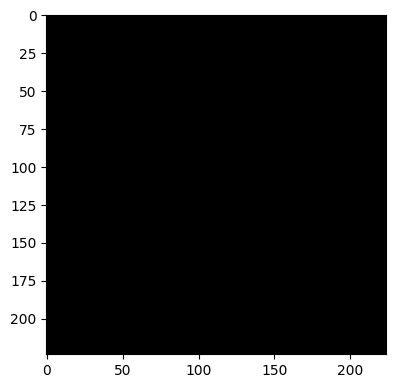

In [12]:
count=0
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        count += 1
        print(count)
        actual_class = [j for j, x in enumerate(labels[i]) if x == 1][0]
        actual_class = class_names[actual_class] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [16]:
import tensorflow as tf

def predict_with_tflite_model(model_path, input_data):
    input_data = np.expand_dims(input_data, axis=0)

    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    return interpreter.get_tensor(output_details[0]['index'])


In [ ]:

classes=['Acne and Rosacea Photos',
 'Eczema Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Nail Fungus and other Nail Disease',
 'akiec',
 'bcc',
 'bkl',
 'df',
 'healthy',
 'mel',
 'nv',
 'vasc']
plt.figure(figsize=(15, 15))
for images, labels in dataset_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        maxPos=0
        maxConfidence=0
        
        confidence= predict_with_tflite_model("../models/tflite/model_v7_vgg_tf_augmented_12d_60acc.tflite", images[i].numpy())
        actual_class = class_names[labels[i]] 
        for i in range(len(confidence[0])):
               
                if confidence[0][i]>maxConfidence:
                  
                    maxConfidence=confidence[0][i]
                    maxPos=i
        predicted_class=classes[maxPos]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence[0][maxPos]}%")
        
        plt.axis("off")

In [13]:
class_names=['arp',
 'Ecz',
 'akiec',
 'bcc',
 'bkl',
 'df',
 'hl',
 'mel',
 'nv',
 'vasc']

In [14]:
class_names

['arp', 'Ecz', 'akiec', 'bcc', 'bkl', 'df', 'hl', 'mel', 'nv', 'vasc']

1/1 [==============================] - 0s 19ms/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 23ms/step
3
1/1 [==============================] - 0s 18ms/step
4
1/1 [==============================] - 0s 20ms/step
5
1/1 [==============================] - 0s 17ms/step
6
1/1 [==============================] - 0s 18ms/step
7
1/1 [==============================] - 0s 24ms/step
8
1/1 [==============================] - 0s 21ms/step
9
1/1 [==============================] - 0s 27ms/step
10
1/1 [==============================] - 0s 33ms/step
11
1/1 [==============================] - 0s 4ms/step
12
1/1 [==============================] - 0s 21ms/step
13
1/1 [==============================] - 0s 29ms/step
14
1/1 [==============================] - 0s 32ms/step
15
1/1 [==============================] - 0s 28ms/step
16
1/1 [==============================] - 0s 20ms/step
17
1/1 [==============================] - 0s 16ms/step
18
1/1 [===============

1/1 [==============================] - 0s 14ms/step
149
1/1 [==============================] - 0s 21ms/step
150
1/1 [==============================] - 0s 20ms/step
151
1/1 [==============================] - 0s 19ms/step
152
1/1 [==============================] - 0s 25ms/step
153
1/1 [==============================] - 0s 19ms/step
154
1/1 [==============================] - 0s 25ms/step
155
1/1 [==============================] - 0s 44ms/step
156
1/1 [==============================] - 0s 20ms/step
157
1/1 [==============================] - 0s 19ms/step
158
1/1 [==============================] - 0s 16ms/step
159
1/1 [==============================] - 0s 19ms/step
160
1/1 [==============================] - 0s 16ms/step
161
1/1 [==============================] - 0s 21ms/step
162
1/1 [==============================] - 0s 16ms/step
163
1/1 [==============================] - 0s 25ms/step
164
1/1 [==============================] - 0s 19ms/step
165
1/1 [==============================] - 0s 17ms/s

1/1 [==============================] - 0s 28ms/step
295
1/1 [==============================] - 0s 23ms/step
296
1/1 [==============================] - 0s 22ms/step
297
1/1 [==============================] - 0s 24ms/step
298
1/1 [==============================] - 0s 19ms/step
299
1/1 [==============================] - 0s 19ms/step
300
1/1 [==============================] - 0s 20ms/step
301
1/1 [==============================] - 0s 20ms/step
302
1/1 [==============================] - 0s 19ms/step
303
1/1 [==============================] - 0s 24ms/step
304
1/1 [==============================] - 0s 16ms/step
305
1/1 [==============================] - 0s 33ms/step
306
1/1 [==============================] - 0s 20ms/step
307
1/1 [==============================] - 0s 24ms/step
308
1/1 [==============================] - 0s 20ms/step
309
1/1 [==============================] - 0s 24ms/step
310
1/1 [==============================] - 0s 22ms/step
311
1/1 [==============================] - 0s 17ms/s

1/1 [==============================] - 0s 31ms/step
441
1/1 [==============================] - 0s 16ms/step
442
1/1 [==============================] - 0s 31ms/step
443
1/1 [==============================] - 0s 18ms/step
444
1/1 [==============================] - 0s 12ms/step
445
1/1 [==============================] - 0s 16ms/step
446
1/1 [==============================] - 0s 18ms/step
447
1/1 [==============================] - 0s 20ms/step
448
1/1 [==============================] - 0s 19ms/step
449
1/1 [==============================] - 0s 16ms/step
450
1/1 [==============================] - 0s 18ms/step
451
1/1 [==============================] - 0s 17ms/step
452
1/1 [==============================] - 0s 28ms/step
453
1/1 [==============================] - 0s 18ms/step
454
1/1 [==============================] - 0s 17ms/step
455
1/1 [==============================] - 0s 15ms/step
456
1/1 [==============================] - 0s 15ms/step
457
1/1 [==============================] - 0s 16ms/s

1/1 [==============================] - 0s 12ms/step
587
1/1 [==============================] - 0s 18ms/step
588
1/1 [==============================] - 0s 24ms/step
589
1/1 [==============================] - 0s 16ms/step
590
1/1 [==============================] - 0s 17ms/step
591
1/1 [==============================] - 0s 32ms/step
592
1/1 [==============================] - 0s 16ms/step
593
1/1 [==============================] - 0s 16ms/step
594
1/1 [==============================] - 0s 8ms/step
595
1/1 [==============================] - 0s 16ms/step
596
1/1 [==============================] - 0s 30ms/step
597
1/1 [==============================] - 0s 15ms/step
598
1/1 [==============================] - 0s 18ms/step
599
1/1 [==============================] - 0s 19ms/step
600
1/1 [==============================] - 0s 16ms/step
601
1/1 [==============================] - 0s 16ms/step
602
1/1 [==============================] - 0s 25ms/step
603
1/1 [==============================] - 0s 20ms/st

1/1 [==============================] - 0s 19ms/step
733
1/1 [==============================] - 0s 24ms/step
734
1/1 [==============================] - 0s 20ms/step
735
1/1 [==============================] - 0s 18ms/step
736
1/1 [==============================] - 0s 28ms/step
737
1/1 [==============================] - 0s 32ms/step
738
1/1 [==============================] - 0s 28ms/step
739
1/1 [==============================] - 0s 23ms/step
740
1/1 [==============================] - 0s 23ms/step
741
1/1 [==============================] - 0s 26ms/step
742
1/1 [==============================] - 0s 26ms/step
743
1/1 [==============================] - 0s 27ms/step
744
1/1 [==============================] - 0s 21ms/step
745
1/1 [==============================] - 0s 22ms/step
746
1/1 [==============================] - 0s 20ms/step
747
1/1 [==============================] - 0s 24ms/step
748
1/1 [==============================] - 0s 20ms/step
749
1/1 [==============================] - 0s 20ms/s

1/1 [==============================] - 0s 32ms/step
879
1/1 [==============================] - 0s 16ms/step
880
1/1 [==============================] - 0s 16ms/step
881
1/1 [==============================] - 0s 16ms/step
882
1/1 [==============================] - 0s 16ms/step
883
1/1 [==============================] - 0s 16ms/step
884
1/1 [==============================] - 0s 31ms/step
885
1/1 [==============================] - 0s 16ms/step
886
1/1 [==============================] - 0s 24ms/step
887
1/1 [==============================] - 0s 31ms/step
888
1/1 [==============================] - 0s 16ms/step
889
1/1 [==============================] - 0s 16ms/step
890
1/1 [==============================] - 0s 19ms/step
891
1/1 [==============================] - 0s 16ms/step
892
1/1 [==============================] - 0s 16ms/step
893
1/1 [==============================] - 0s 16ms/step
894
1/1 [==============================] - 0s 31ms/step
895
1/1 [==============================] - 0s 16ms/s

1/1 [==============================] - 0s 18ms/step
1025
1/1 [==============================] - 0s 16ms/step
1026
1/1 [==============================] - 0s 16ms/step
1027
1/1 [==============================] - 0s 22ms/step
1028
1/1 [==============================] - 0s 26ms/step
1029
1/1 [==============================] - 0s 27ms/step
1030
1/1 [==============================] - 0s 14ms/step
1031
1/1 [==============================] - 0s 11ms/step
1032
1/1 [==============================] - 0s 16ms/step
1033
1/1 [==============================] - 0s 16ms/step
1034
1/1 [==============================] - 0s 17ms/step
1035
1/1 [==============================] - 0s 17ms/step
1036
1/1 [==============================] - 0s 27ms/step
1037
1/1 [==============================] - 0s 20ms/step
1038
1/1 [==============================] - 0s 17ms/step
1039
1/1 [==============================] - 0s 32ms/step
1040
1/1 [==============================] - 0s 16ms/step
1041
1/1 [==========================

1/1 [==============================] - 0s 31ms/step
1168
1/1 [==============================] - 0s 27ms/step
1169
1/1 [==============================] - 0s 29ms/step
1170
1/1 [==============================] - 0s 13ms/step
1171
1/1 [==============================] - 0s 15ms/step
1172
1/1 [==============================] - 0s 16ms/step
1173
1/1 [==============================] - 0s 17ms/step
1174
1/1 [==============================] - 0s 9ms/step
1175
1/1 [==============================] - 0s 11ms/step
1176
1/1 [==============================] - 0s 13ms/step
1177
1/1 [==============================] - 0s 15ms/step
1178
1/1 [==============================] - 0s 21ms/step
1179
1/1 [==============================] - 0s 16ms/step
1180
1/1 [==============================] - 0s 23ms/step
1181
1/1 [==============================] - 0s 15ms/step
1182
1/1 [==============================] - 0s 33ms/step
1183
1/1 [==============================] - 0s 18ms/step
1184
1/1 [===========================

1/1 [==============================] - 0s 16ms/step
1311
1/1 [==============================] - 0s 14ms/step
1312
1/1 [==============================] - 0s 18ms/step
1313
1/1 [==============================] - 0s 20ms/step
1314
1/1 [==============================] - 0s 23ms/step
1315
1/1 [==============================] - 0s 16ms/step
1316
1/1 [==============================] - 0s 21ms/step
1317
1/1 [==============================] - 0s 21ms/step
1318
1/1 [==============================] - 0s 20ms/step
1319
1/1 [==============================] - 0s 26ms/step
1320
1/1 [==============================] - 0s 18ms/step
1321
1/1 [==============================] - 0s 17ms/step
1322
1/1 [==============================] - 0s 17ms/step
1323
1/1 [==============================] - 0s 20ms/step
1324
1/1 [==============================] - 0s 12ms/step
1325
1/1 [==============================] - 0s 26ms/step
1326
1/1 [==============================] - 0s 21ms/step
1327
1/1 [==========================

1/1 [==============================] - 0s 20ms/step
1454
1/1 [==============================] - 0s 25ms/step
1455
1/1 [==============================] - 0s 19ms/step
1456
1/1 [==============================] - 0s 27ms/step
1457
1/1 [==============================] - 0s 21ms/step
1458
1/1 [==============================] - 0s 19ms/step
1459
1/1 [==============================] - 0s 19ms/step
1460
1/1 [==============================] - 0s 30ms/step
1461
1/1 [==============================] - 0s 16ms/step
1462
1/1 [==============================] - 0s 16ms/step
1463
1/1 [==============================] - 0s 21ms/step
1464
1/1 [==============================] - 0s 20ms/step
1465
1/1 [==============================] - 0s 16ms/step
1466
1/1 [==============================] - 0s 31ms/step
1467
1/1 [==============================] - 0s 15ms/step
1468
1/1 [==============================] - 0s 15ms/step
1469
1/1 [==============================] - 0s 22ms/step
1470
1/1 [==========================

1/1 [==============================] - 0s 21ms/step
1597
1/1 [==============================] - 0s 21ms/step
1598
1/1 [==============================] - 0s 18ms/step
1599
1/1 [==============================] - 0s 22ms/step
1600
1/1 [==============================] - 0s 19ms/step
1601
1/1 [==============================] - 0s 20ms/step
1602
1/1 [==============================] - 0s 30ms/step
1603
1/1 [==============================] - 0s 12ms/step
1604
1/1 [==============================] - 0s 27ms/step
1605
1/1 [==============================] - 0s 19ms/step
1606
1/1 [==============================] - 0s 21ms/step
1607
1/1 [==============================] - 0s 19ms/step
1608
1/1 [==============================] - 0s 19ms/step
1609
1/1 [==============================] - 0s 22ms/step
1610
1/1 [==============================] - 0s 17ms/step
1611
1/1 [==============================] - 0s 18ms/step
1612
1/1 [==============================] - 0s 20ms/step
1613
1/1 [==========================

1/1 [==============================] - 0s 17ms/step
1740
1/1 [==============================] - 0s 20ms/step
1741
1/1 [==============================] - 0s 16ms/step
1742
1/1 [==============================] - 0s 19ms/step
1743
1/1 [==============================] - 0s 21ms/step
1744
1/1 [==============================] - 0s 25ms/step
1745
1/1 [==============================] - 0s 18ms/step
1746
1/1 [==============================] - 0s 23ms/step
1747
1/1 [==============================] - 0s 22ms/step
1748
1/1 [==============================] - 0s 16ms/step
1749
1/1 [==============================] - 0s 32ms/step
1750
1/1 [==============================] - 0s 16ms/step
1751
1/1 [==============================] - 0s 14ms/step
1752
1/1 [==============================] - 0s 16ms/step
1753
1/1 [==============================] - 0s 18ms/step
1754
1/1 [==============================] - 0s 20ms/step
1755
1/1 [==============================] - 0s 19ms/step
1756
1/1 [==========================

1/1 [==============================] - 0s 32ms/step
1883
1/1 [==============================] - 0s 18ms/step
1884
1/1 [==============================] - 0s 16ms/step
1885
1/1 [==============================] - 0s 12ms/step
1886
1/1 [==============================] - 0s 19ms/step
1887
1/1 [==============================] - 0s 16ms/step
1888
1/1 [==============================] - 0s 22ms/step
1889
1/1 [==============================] - 0s 23ms/step
1890
1/1 [==============================] - 0s 25ms/step
1891
1/1 [==============================] - 0s 21ms/step
1892
1/1 [==============================] - 0s 12ms/step
1893
1/1 [==============================] - 0s 16ms/step
1894
1/1 [==============================] - 0s 28ms/step
1895
1/1 [==============================] - 0s 20ms/step
1896
1/1 [==============================] - 0s 20ms/step
1897
1/1 [==============================] - 0s 17ms/step
1898
1/1 [==============================] - 0s 7ms/step
1899
1/1 [===========================

1/1 [==============================] - 0s 27ms/step
2026
1/1 [==============================] - 0s 25ms/step
2027
1/1 [==============================] - 0s 23ms/step
2028
1/1 [==============================] - 0s 19ms/step
2029
1/1 [==============================] - 0s 16ms/step
2030
1/1 [==============================] - 0s 32ms/step
2031
1/1 [==============================] - 0s 16ms/step
2032
1/1 [==============================] - 0s 32ms/step
2033
1/1 [==============================] - 0s 14ms/step
2034
1/1 [==============================] - 0s 24ms/step
2035
1/1 [==============================] - 0s 18ms/step
2036
1/1 [==============================] - 0s 16ms/step
2037
1/1 [==============================] - 0s 19ms/step
2038
1/1 [==============================] - 0s 33ms/step
2039
1/1 [==============================] - 0s 16ms/step
2040
1/1 [==============================] - 0s 31ms/step
2041
1/1 [==============================] - 0s 27ms/step
2042
1/1 [==========================

1/1 [==============================] - 0s 21ms/step
2169
1/1 [==============================] - 0s 21ms/step
2170
1/1 [==============================] - 0s 23ms/step
2171
1/1 [==============================] - 0s 21ms/step
2172
1/1 [==============================] - 0s 19ms/step
2173
1/1 [==============================] - 0s 21ms/step
2174
1/1 [==============================] - 0s 21ms/step
2175
1/1 [==============================] - 0s 22ms/step
2176
1/1 [==============================] - 0s 32ms/step
2177
1/1 [==============================] - 0s 28ms/step
2178
1/1 [==============================] - 0s 19ms/step
2179
1/1 [==============================] - 0s 32ms/step
2180
1/1 [==============================] - 0s 25ms/step
2181
1/1 [==============================] - 0s 23ms/step
2182
1/1 [==============================] - 0s 25ms/step
2183
1/1 [==============================] - 0s 30ms/step
2184
1/1 [==============================] - 0s 24ms/step
2185
1/1 [==========================

2312
1/1 [==============================] - 0s 22ms/step
2313
1/1 [==============================] - 0s 22ms/step
2314
1/1 [==============================] - 0s 21ms/step
2315
1/1 [==============================] - 0s 23ms/step
2316
1/1 [==============================] - 0s 30ms/step
2317
1/1 [==============================] - 0s 21ms/step
2318
1/1 [==============================] - 0s 24ms/step
2319
1/1 [==============================] - 0s 20ms/step
2320
1/1 [==============================] - 0s 22ms/step
2321
1/1 [==============================] - 0s 15ms/step
2322
1/1 [==============================] - 0s 12ms/step
2323
1/1 [==============================] - 0s 24ms/step
2324
1/1 [==============================] - 0s 20ms/step
2325
1/1 [==============================] - 0s 26ms/step
2326
1/1 [==============================] - 0s 32ms/step
2327
1/1 [==============================] - 0s 31ms/step
2328
1/1 [==============================] - 0s 17ms/step
2329
1/1 [=====================

1/1 [==============================] - 0s 21ms/step
2456
1/1 [==============================] - 0s 20ms/step
2457
1/1 [==============================] - 0s 12ms/step
2458
1/1 [==============================] - 0s 16ms/step
2459
1/1 [==============================] - 0s 23ms/step
2460
1/1 [==============================] - 0s 31ms/step
2461
1/1 [==============================] - 0s 23ms/step
2462
1/1 [==============================] - 0s 21ms/step
2463
1/1 [==============================] - 0s 27ms/step
2464
1/1 [==============================] - 0s 20ms/step
2465
1/1 [==============================] - 0s 25ms/step
2466
1/1 [==============================] - 0s 23ms/step
2467
1/1 [==============================] - 0s 23ms/step
2468
1/1 [==============================] - 0s 23ms/step
2469
1/1 [==============================] - 0s 21ms/step
2470
1/1 [==============================] - 0s 23ms/step
2471
1/1 [==============================] - 0s 24ms/step
2472
1/1 [==========================

1/1 [==============================] - 0s 34ms/step
2599
1/1 [==============================] - 0s 24ms/step
2600
1/1 [==============================] - 0s 20ms/step
2601
1/1 [==============================] - 0s 17ms/step
2602
1/1 [==============================] - 0s 28ms/step
2603
1/1 [==============================] - 0s 28ms/step
2604
1/1 [==============================] - 0s 19ms/step
2605
1/1 [==============================] - 0s 20ms/step
2606
1/1 [==============================] - 0s 23ms/step
2607
1/1 [==============================] - 0s 33ms/step
2608
1/1 [==============================] - 0s 21ms/step
2609
1/1 [==============================] - 0s 28ms/step
2610
1/1 [==============================] - 0s 22ms/step
2611
1/1 [==============================] - 0s 19ms/step
2612
1/1 [==============================] - 0s 23ms/step
2613
1/1 [==============================] - 0s 24ms/step
2614
1/1 [==============================] - 0s 16ms/step
2615
1/1 [==========================

1/1 [==============================] - 0s 16ms/step
2742
1/1 [==============================] - 0s 15ms/step
2743
1/1 [==============================] - 0s 16ms/step
2744
1/1 [==============================] - 0s 18ms/step
2745
1/1 [==============================] - 0s 30ms/step
2746
1/1 [==============================] - 0s 16ms/step
2747
1/1 [==============================] - 0s 16ms/step
2748
1/1 [==============================] - 0s 32ms/step
2749
1/1 [==============================] - 0s 16ms/step
2750
1/1 [==============================] - 0s 16ms/step
2751
1/1 [==============================] - 0s 21ms/step
2752
1/1 [==============================] - 0s 17ms/step
2753
1/1 [==============================] - 0s 15ms/step
2754
1/1 [==============================] - 0s 13ms/step
2755
1/1 [==============================] - 0s 15ms/step
2756
1/1 [==============================] - 0s 21ms/step
2757
1/1 [==============================] - 0s 16ms/step
2758
1/1 [==========================

1/1 [==============================] - 0s 17ms/step
2885
1/1 [==============================] - 0s 18ms/step
2886
1/1 [==============================] - 0s 20ms/step
2887
1/1 [==============================] - 0s 16ms/step
2888
1/1 [==============================] - 0s 17ms/step
2889
1/1 [==============================] - 0s 16ms/step
2890
1/1 [==============================] - 0s 20ms/step
2891
1/1 [==============================] - 0s 18ms/step
2892
1/1 [==============================] - 0s 33ms/step
2893
1/1 [==============================] - 0s 16ms/step
2894
1/1 [==============================] - 0s 18ms/step
2895
1/1 [==============================] - 0s 31ms/step
2896
1/1 [==============================] - 0s 33ms/step
2897
1/1 [==============================] - 0s 18ms/step
2898
1/1 [==============================] - 0s 18ms/step
2899
1/1 [==============================] - 0s 19ms/step
2900
1/1 [==============================] - 0s 19ms/step
2901
1/1 [==========================

1/1 [==============================] - 0s 20ms/step
3028
1/1 [==============================] - 0s 21ms/step
3029
1/1 [==============================] - 0s 16ms/step
3030
1/1 [==============================] - 0s 16ms/step
3031
1/1 [==============================] - 0s 16ms/step
3032
1/1 [==============================] - 0s 21ms/step
3033
1/1 [==============================] - 0s 23ms/step
3034
1/1 [==============================] - 0s 16ms/step
3035
1/1 [==============================] - 0s 27ms/step
3036
1/1 [==============================] - 0s 30ms/step
3037
1/1 [==============================] - 0s 19ms/step
3038
1/1 [==============================] - 0s 16ms/step
3039
1/1 [==============================] - 0s 22ms/step
3040
1/1 [==============================] - 0s 22ms/step
3041
1/1 [==============================] - 0s 21ms/step
3042
1/1 [==============================] - 0s 23ms/step
3043
1/1 [==============================] - 0s 16ms/step
3044
1/1 [==========================

1/1 [==============================] - 0s 16ms/step
3171
1/1 [==============================] - 0s 22ms/step
3172
1/1 [==============================] - 0s 18ms/step
3173
1/1 [==============================] - 0s 15ms/step
3174
1/1 [==============================] - 0s 19ms/step
3175
1/1 [==============================] - 0s 17ms/step
3176
1/1 [==============================] - 0s 21ms/step
3177
1/1 [==============================] - 0s 19ms/step
3178
1/1 [==============================] - 0s 19ms/step
3179
1/1 [==============================] - 0s 32ms/step
3180
1/1 [==============================] - 0s 18ms/step
3181
1/1 [==============================] - 0s 23ms/step
3182
1/1 [==============================] - 0s 17ms/step
3183
1/1 [==============================] - 0s 25ms/step
3184
1/1 [==============================] - 0s 26ms/step
3185
1/1 [==============================] - 0s 29ms/step
3186
1/1 [==============================] - 0s 30ms/step
3187
1/1 [==========================

1/1 [==============================] - 0s 14ms/step
3314
1/1 [==============================] - 0s 18ms/step
3315
1/1 [==============================] - 0s 29ms/step
3316
1/1 [==============================] - 0s 14ms/step
3317
1/1 [==============================] - 0s 32ms/step
3318
1/1 [==============================] - 0s 21ms/step
3319
1/1 [==============================] - 0s 29ms/step
3320
1/1 [==============================] - 0s 19ms/step
3321
1/1 [==============================] - 0s 32ms/step
3322
1/1 [==============================] - 0s 17ms/step
3323
1/1 [==============================] - 0s 21ms/step
3324
1/1 [==============================] - 0s 27ms/step
3325
1/1 [==============================] - 0s 20ms/step
3326
1/1 [==============================] - 0s 33ms/step
3327
1/1 [==============================] - 0s 19ms/step
3328
1/1 [==============================] - 0s 36ms/step
3329
1/1 [==============================] - 0s 16ms/step
3330
1/1 [==========================

1/1 [==============================] - 0s 14ms/step
3457
1/1 [==============================] - 0s 18ms/step
3458
1/1 [==============================] - 0s 17ms/step
3459
1/1 [==============================] - 0s 19ms/step
3460
1/1 [==============================] - 0s 16ms/step
3461
1/1 [==============================] - 0s 18ms/step
3462
1/1 [==============================] - 0s 16ms/step
3463
1/1 [==============================] - 0s 14ms/step
3464
1/1 [==============================] - 0s 16ms/step
3465
1/1 [==============================] - 0s 14ms/step
3466
1/1 [==============================] - 0s 21ms/step
3467
1/1 [==============================] - 0s 20ms/step
3468
1/1 [==============================] - 0s 21ms/step
3469
1/1 [==============================] - 0s 20ms/step
3470
1/1 [==============================] - 0s 19ms/step
3471
1/1 [==============================] - 0s 21ms/step
3472
1/1 [==============================] - 0s 20ms/step
3473
1/1 [==========================

1/1 [==============================] - 0s 20ms/step
3600
1/1 [==============================] - 0s 19ms/step
3601
1/1 [==============================] - 0s 19ms/step
3602
1/1 [==============================] - 0s 20ms/step
3603
1/1 [==============================] - 0s 21ms/step
3604
1/1 [==============================] - 0s 20ms/step
3605
1/1 [==============================] - 0s 21ms/step
3606
1/1 [==============================] - 0s 23ms/step
3607
1/1 [==============================] - 0s 20ms/step
3608
1/1 [==============================] - 0s 33ms/step
3609
1/1 [==============================] - 0s 23ms/step
3610
1/1 [==============================] - 0s 23ms/step
3611
1/1 [==============================] - 0s 21ms/step
3612
1/1 [==============================] - 0s 17ms/step
3613
1/1 [==============================] - 0s 19ms/step
3614
1/1 [==============================] - 0s 19ms/step
3615
1/1 [==============================] - 0s 30ms/step
3616
1/1 [==========================

1/1 [==============================] - 0s 28ms/step
3743
1/1 [==============================] - 0s 18ms/step
3744
1/1 [==============================] - 0s 24ms/step
3745
1/1 [==============================] - 0s 19ms/step
3746
1/1 [==============================] - 0s 34ms/step
3747
1/1 [==============================] - 0s 26ms/step
3748
1/1 [==============================] - 0s 23ms/step
3749
1/1 [==============================] - 0s 30ms/step
3750
1/1 [==============================] - 0s 19ms/step
3751
1/1 [==============================] - 0s 32ms/step
3752
1/1 [==============================] - 0s 14ms/step
3753
1/1 [==============================] - 0s 18ms/step
3754
1/1 [==============================] - 0s 30ms/step
3755
1/1 [==============================] - 0s 22ms/step
3756
1/1 [==============================] - 0s 21ms/step
3757
1/1 [==============================] - 0s 17ms/step
3758
1/1 [==============================] - 0s 25ms/step
3759
1/1 [==========================

1/1 [==============================] - 0s 25ms/step
3886
1/1 [==============================] - 0s 21ms/step
3887
1/1 [==============================] - 0s 24ms/step
3888
1/1 [==============================] - 0s 18ms/step
3889
1/1 [==============================] - 0s 21ms/step
3890
1/1 [==============================] - 0s 28ms/step
3891
1/1 [==============================] - 0s 19ms/step
3892
1/1 [==============================] - 0s 18ms/step
3893
1/1 [==============================] - 0s 17ms/step
3894
1/1 [==============================] - 0s 16ms/step
3895
1/1 [==============================] - 0s 23ms/step
3896
1/1 [==============================] - 0s 16ms/step
3897
1/1 [==============================] - 0s 17ms/step
3898
1/1 [==============================] - 0s 30ms/step
3899
1/1 [==============================] - 0s 17ms/step
3900
1/1 [==============================] - 0s 13ms/step
3901
1/1 [==============================] - 0s 13ms/step
3902
1/1 [==========================

1/1 [==============================] - 0s 18ms/step
4029
1/1 [==============================] - 0s 17ms/step
4030
1/1 [==============================] - 0s 19ms/step
4031
1/1 [==============================] - 0s 31ms/step
4032
1/1 [==============================] - 0s 23ms/step
4033
1/1 [==============================] - 0s 16ms/step
4034
1/1 [==============================] - 0s 21ms/step
4035
1/1 [==============================] - 0s 20ms/step
4036
1/1 [==============================] - 0s 23ms/step
4037
1/1 [==============================] - 0s 24ms/step
4038
1/1 [==============================] - 0s 16ms/step
4039
1/1 [==============================] - 0s 29ms/step
4040
1/1 [==============================] - 0s 32ms/step
4041
1/1 [==============================] - 0s 17ms/step
4042
1/1 [==============================] - 0s 21ms/step
4043
1/1 [==============================] - 0s 32ms/step
4044
1/1 [==============================] - 0s 14ms/step
4045
1/1 [==========================

1/1 [==============================] - 0s 18ms/step
4172
1/1 [==============================] - 0s 11ms/step
4173
1/1 [==============================] - 0s 23ms/step
4174
1/1 [==============================] - 0s 24ms/step
4175
1/1 [==============================] - 0s 15ms/step
4176
1/1 [==============================] - 0s 20ms/step
4177
1/1 [==============================] - 0s 30ms/step
4178
1/1 [==============================] - 0s 24ms/step
4179
1/1 [==============================] - 0s 21ms/step
4180
1/1 [==============================] - 0s 13ms/step
4181
1/1 [==============================] - 0s 26ms/step
4182
1/1 [==============================] - 0s 18ms/step
4183
1/1 [==============================] - 0s 32ms/step
4184
1/1 [==============================] - 0s 32ms/step
4185
1/1 [==============================] - 0s 25ms/step
4186
1/1 [==============================] - 0s 23ms/step
4187
1/1 [==============================] - 0s 30ms/step
4188
1/1 [==========================

1/1 [==============================] - 0s 10ms/step
4315
1/1 [==============================] - 0s 13ms/step
4316
1/1 [==============================] - 0s 23ms/step
4317
1/1 [==============================] - 0s 21ms/step
4318
1/1 [==============================] - 0s 19ms/step
4319
1/1 [==============================] - 0s 29ms/step
4320
1/1 [==============================] - 0s 21ms/step
4321
1/1 [==============================] - 0s 28ms/step
4322
1/1 [==============================] - 0s 16ms/step
4323
1/1 [==============================] - 0s 26ms/step
4324
1/1 [==============================] - 0s 18ms/step
4325
1/1 [==============================] - 0s 21ms/step
4326
1/1 [==============================] - 0s 18ms/step
4327
1/1 [==============================] - 0s 17ms/step
4328
1/1 [==============================] - 0s 17ms/step
4329
1/1 [==============================] - 0s 16ms/step
4330
1/1 [==============================] - 0s 19ms/step
4331
1/1 [==========================

1/1 [==============================] - 0s 15ms/step
4458
1/1 [==============================] - 0s 14ms/step
4459
1/1 [==============================] - 0s 22ms/step
4460
1/1 [==============================] - 0s 7ms/step
4461
1/1 [==============================] - 0s 17ms/step
4462
1/1 [==============================] - 0s 14ms/step
4463
1/1 [==============================] - 0s 9ms/step
4464
1/1 [==============================] - 0s 31ms/step
4465
1/1 [==============================] - 0s 21ms/step
4466
1/1 [==============================] - 0s 16ms/step
4467
1/1 [==============================] - 0s 33ms/step
4468
1/1 [==============================] - 0s 20ms/step
4469
1/1 [==============================] - 0s 16ms/step
4470
1/1 [==============================] - 0s 22ms/step
4471
1/1 [==============================] - 0s 27ms/step
4472
1/1 [==============================] - 0s 19ms/step
4473
1/1 [==============================] - 0s 25ms/step
4474
1/1 [============================

1/1 [==============================] - 0s 16ms/step
4601
1/1 [==============================] - 0s 16ms/step
4602
1/1 [==============================] - 0s 15ms/step
4603
1/1 [==============================] - 0s 17ms/step
4604
1/1 [==============================] - 0s 23ms/step
4605
1/1 [==============================] - 0s 19ms/step
4606
1/1 [==============================] - 0s 15ms/step
4607
1/1 [==============================] - 0s 29ms/step
4608
1/1 [==============================] - 0s 20ms/step
4609
1/1 [==============================] - 0s 29ms/step
4610
1/1 [==============================] - 0s 19ms/step
4611
1/1 [==============================] - 0s 23ms/step
4612
1/1 [==============================] - 0s 32ms/step
4613
1/1 [==============================] - 0s 32ms/step
4614
1/1 [==============================] - 0s 19ms/step
4615
1/1 [==============================] - 0s 16ms/step
4616
1/1 [==============================] - 0s 26ms/step
4617
1/1 [==========================

1/1 [==============================] - 0s 22ms/step
4744
1/1 [==============================] - 0s 17ms/step
4745
1/1 [==============================] - 0s 24ms/step
4746
1/1 [==============================] - 0s 22ms/step
4747
1/1 [==============================] - 0s 18ms/step
4748
1/1 [==============================] - 0s 22ms/step
4749
1/1 [==============================] - 0s 29ms/step
4750
1/1 [==============================] - 0s 23ms/step
4751
1/1 [==============================] - 0s 17ms/step
4752
1/1 [==============================] - 0s 31ms/step
4753
1/1 [==============================] - 0s 33ms/step
4754
1/1 [==============================] - 0s 23ms/step
4755
1/1 [==============================] - 0s 20ms/step
4756
1/1 [==============================] - 0s 20ms/step
4757
1/1 [==============================] - 0s 21ms/step
4758
1/1 [==============================] - 0s 32ms/step
4759
1/1 [==============================] - 0s 25ms/step
4760
1/1 [==========================

1/1 [==============================] - 0s 28ms/step
4887
1/1 [==============================] - 0s 19ms/step
4888
1/1 [==============================] - 0s 24ms/step
4889
1/1 [==============================] - 0s 16ms/step
4890
1/1 [==============================] - 0s 34ms/step
4891
1/1 [==============================] - 0s 26ms/step
4892
1/1 [==============================] - 0s 16ms/step
4893
1/1 [==============================] - 0s 31ms/step
4894
1/1 [==============================] - 0s 24ms/step
4895
1/1 [==============================] - 0s 13ms/step
4896
1/1 [==============================] - 0s 20ms/step
4897
1/1 [==============================] - 0s 19ms/step
4898
1/1 [==============================] - 0s 26ms/step
4899
1/1 [==============================] - 0s 29ms/step
4900
1/1 [==============================] - 0s 19ms/step
4901
1/1 [==============================] - 0s 27ms/step
4902
1/1 [==============================] - 0s 16ms/step
4903
1/1 [==========================

1/1 [==============================] - 0s 12ms/step
5030
1/1 [==============================] - 0s 16ms/step
5031
1/1 [==============================] - 0s 17ms/step
5032
1/1 [==============================] - 0s 22ms/step
5033
1/1 [==============================] - 0s 13ms/step
5034
1/1 [==============================] - 0s 27ms/step
5035
1/1 [==============================] - 0s 19ms/step
5036
1/1 [==============================] - 0s 18ms/step
5037
1/1 [==============================] - 0s 32ms/step
5038
1/1 [==============================] - 0s 11ms/step
5039
1/1 [==============================] - 0s 21ms/step
5040
1/1 [==============================] - 0s 16ms/step
5041
1/1 [==============================] - 0s 27ms/step
5042
1/1 [==============================] - 0s 12ms/step
5043
1/1 [==============================] - 0s 17ms/step
5044
1/1 [==============================] - 0s 24ms/step
5045
1/1 [==============================] - 0s 17ms/step
5046
1/1 [==========================

1/1 [==============================] - 0s 26ms/step
5173
1/1 [==============================] - 0s 21ms/step
5174
1/1 [==============================] - 0s 19ms/step
5175
1/1 [==============================] - 0s 19ms/step
5176
1/1 [==============================] - 0s 32ms/step
5177
1/1 [==============================] - 0s 22ms/step
5178
1/1 [==============================] - 0s 23ms/step
5179
1/1 [==============================] - 0s 13ms/step
5180
1/1 [==============================] - 0s 20ms/step
5181
1/1 [==============================] - 0s 19ms/step
5182
1/1 [==============================] - 0s 20ms/step
5183
1/1 [==============================] - 0s 20ms/step
5184
1/1 [==============================] - 0s 25ms/step
5185
1/1 [==============================] - 0s 23ms/step
5186
1/1 [==============================] - 0s 34ms/step
5187
1/1 [==============================] - 0s 22ms/step
5188
1/1 [==============================] - 0s 23ms/step
5189
1/1 [==========================

5316
1/1 [==============================] - 0s 21ms/step
5317
1/1 [==============================] - 0s 20ms/step
5318
1/1 [==============================] - 0s 21ms/step
5319
1/1 [==============================] - 0s 18ms/step
5320
1/1 [==============================] - 0s 21ms/step
5321
1/1 [==============================] - 0s 21ms/step
5322
1/1 [==============================] - 0s 22ms/step
5323
1/1 [==============================] - 0s 26ms/step
5324
1/1 [==============================] - 0s 19ms/step
5325
1/1 [==============================] - 0s 25ms/step
5326
1/1 [==============================] - 0s 17ms/step
5327
1/1 [==============================] - 0s 18ms/step
5328
1/1 [==============================] - 0s 22ms/step
5329
1/1 [==============================] - 0s 18ms/step
5330
1/1 [==============================] - 0s 30ms/step
5331
1/1 [==============================] - 0s 17ms/step
5332
1/1 [==============================] - 0s 32ms/step
5333
1/1 [=====================

1/1 [==============================] - 0s 18ms/step
5460
1/1 [==============================] - 0s 21ms/step
5461
1/1 [==============================] - 0s 23ms/step
5462
1/1 [==============================] - 0s 16ms/step
5463
1/1 [==============================] - 0s 20ms/step
5464
1/1 [==============================] - 0s 18ms/step
5465
1/1 [==============================] - 0s 33ms/step
5466
1/1 [==============================] - 0s 31ms/step
5467
1/1 [==============================] - 0s 23ms/step
5468
1/1 [==============================] - 0s 16ms/step
5469
1/1 [==============================] - 0s 20ms/step
5470
1/1 [==============================] - 0s 19ms/step
5471
1/1 [==============================] - 0s 19ms/step
5472
1/1 [==============================] - 0s 15ms/step
5473
1/1 [==============================] - 0s 19ms/step
5474
1/1 [==============================] - 0s 19ms/step
5475
1/1 [==============================] - 0s 22ms/step
5476
1/1 [==========================

1/1 [==============================] - 0s 22ms/step
5603
1/1 [==============================] - 0s 19ms/step
5604
1/1 [==============================] - 0s 19ms/step
5605
1/1 [==============================] - 0s 27ms/step
5606
1/1 [==============================] - 0s 19ms/step
5607
1/1 [==============================] - 0s 15ms/step
5608
1/1 [==============================] - 0s 21ms/step
5609
1/1 [==============================] - 0s 20ms/step
5610
1/1 [==============================] - 0s 22ms/step
5611
1/1 [==============================] - 0s 19ms/step
5612
1/1 [==============================] - 0s 25ms/step
5613
1/1 [==============================] - 0s 20ms/step
5614
1/1 [==============================] - 0s 31ms/step
5615
1/1 [==============================] - 0s 16ms/step
5616
1/1 [==============================] - 0s 22ms/step
5617
1/1 [==============================] - 0s 27ms/step
5618
1/1 [==============================] - 0s 21ms/step
5619
1/1 [==========================

1/1 [==============================] - 0s 20ms/step
5746
1/1 [==============================] - 0s 32ms/step
5747
1/1 [==============================] - 0s 22ms/step
5748
1/1 [==============================] - 0s 21ms/step
5749
1/1 [==============================] - 0s 19ms/step
5750
1/1 [==============================] - 0s 19ms/step
5751
1/1 [==============================] - 0s 20ms/step
5752
1/1 [==============================] - 0s 27ms/step
5753
1/1 [==============================] - 0s 19ms/step
5754
1/1 [==============================] - 0s 18ms/step
5755
1/1 [==============================] - 0s 25ms/step
5756
1/1 [==============================] - 0s 18ms/step
5757
1/1 [==============================] - 0s 25ms/step
5758
1/1 [==============================] - 0s 25ms/step
5759
1/1 [==============================] - 0s 30ms/step
5760
1/1 [==============================] - 0s 18ms/step
5761
1/1 [==============================] - 0s 13ms/step
5762
1/1 [==========================

1/1 [==============================] - 0s 20ms/step
5889
1/1 [==============================] - 0s 31ms/step
5890
1/1 [==============================] - 0s 16ms/step
5891
1/1 [==============================] - 0s 16ms/step
5892
1/1 [==============================] - 0s 23ms/step
5893
1/1 [==============================] - 0s 19ms/step
5894
1/1 [==============================] - 0s 27ms/step
5895
1/1 [==============================] - 0s 21ms/step
5896
1/1 [==============================] - 0s 19ms/step
5897
1/1 [==============================] - 0s 25ms/step
5898
1/1 [==============================] - 0s 18ms/step
5899
1/1 [==============================] - 0s 20ms/step
5900
1/1 [==============================] - 0s 27ms/step
5901
1/1 [==============================] - 0s 18ms/step
5902
1/1 [==============================] - 0s 19ms/step
5903
1/1 [==============================] - 0s 21ms/step
5904
1/1 [==============================] - 0s 18ms/step
5905
1/1 [==========================

1/1 [==============================] - 0s 24ms/step
6032
1/1 [==============================] - 0s 17ms/step
6033
1/1 [==============================] - 0s 11ms/step
6034
1/1 [==============================] - 0s 24ms/step
6035
1/1 [==============================] - 0s 26ms/step
6036
1/1 [==============================] - 0s 24ms/step
6037
1/1 [==============================] - 0s 23ms/step
6038
1/1 [==============================] - 0s 18ms/step
6039
1/1 [==============================] - 0s 22ms/step
6040
1/1 [==============================] - 0s 29ms/step
6041
1/1 [==============================] - 0s 21ms/step
6042
1/1 [==============================] - 0s 27ms/step
6043
1/1 [==============================] - 0s 20ms/step
6044
1/1 [==============================] - 0s 21ms/step
6045
1/1 [==============================] - 0s 22ms/step
6046
1/1 [==============================] - 0s 18ms/step
6047
1/1 [==============================] - 0s 19ms/step
6048
1/1 [==========================

1/1 [==============================] - 0s 16ms/step
6175
1/1 [==============================] - 0s 17ms/step
6176
1/1 [==============================] - 0s 16ms/step
6177
1/1 [==============================] - 0s 18ms/step
6178
1/1 [==============================] - 0s 27ms/step
6179
1/1 [==============================] - 0s 18ms/step
6180
1/1 [==============================] - 0s 27ms/step
6181
1/1 [==============================] - 0s 21ms/step
6182
1/1 [==============================] - 0s 34ms/step
6183
1/1 [==============================] - 0s 27ms/step
6184
1/1 [==============================] - 0s 31ms/step
6185
1/1 [==============================] - 0s 24ms/step
6186
1/1 [==============================] - 0s 18ms/step
6187
1/1 [==============================] - 0s 30ms/step
6188
1/1 [==============================] - 0s 25ms/step
6189
1/1 [==============================] - 0s 17ms/step
6190
1/1 [==============================] - 0s 30ms/step
6191
1/1 [==========================

1/1 [==============================] - 0s 21ms/step
6318
1/1 [==============================] - 0s 21ms/step
6319
1/1 [==============================] - 0s 31ms/step
6320
1/1 [==============================] - 0s 31ms/step
6321
1/1 [==============================] - 0s 16ms/step
6322
1/1 [==============================] - 0s 16ms/step
6323
1/1 [==============================] - 0s 8ms/step
6324
1/1 [==============================] - 0s 25ms/step
6325
1/1 [==============================] - 0s 25ms/step
6326
1/1 [==============================] - 0s 24ms/step
6327
1/1 [==============================] - 0s 18ms/step
6328
1/1 [==============================] - 0s 24ms/step
6329
1/1 [==============================] - 0s 20ms/step
6330
1/1 [==============================] - 0s 17ms/step
6331
1/1 [==============================] - 0s 20ms/step
6332
1/1 [==============================] - 0s 20ms/step
6333
1/1 [==============================] - 0s 21ms/step
6334
1/1 [===========================

1/1 [==============================] - 0s 24ms/step
6461
1/1 [==============================] - 0s 18ms/step
6462
1/1 [==============================] - 0s 24ms/step
6463
1/1 [==============================] - 0s 29ms/step
6464
1/1 [==============================] - 0s 18ms/step
6465
1/1 [==============================] - 0s 17ms/step
6466
1/1 [==============================] - 0s 21ms/step
6467
1/1 [==============================] - 0s 31ms/step
6468
1/1 [==============================] - 0s 23ms/step
6469
1/1 [==============================] - 0s 16ms/step
6470
1/1 [==============================] - 0s 16ms/step
6471
1/1 [==============================] - 0s 25ms/step
6472
1/1 [==============================] - 0s 18ms/step
6473
1/1 [==============================] - 0s 28ms/step
6474
1/1 [==============================] - 0s 20ms/step
6475
1/1 [==============================] - 0s 29ms/step
6476
1/1 [==============================] - 0s 23ms/step
6477
1/1 [==========================

1/1 [==============================] - 0s 25ms/step
6604
1/1 [==============================] - 0s 21ms/step
6605
1/1 [==============================] - 0s 18ms/step
6606
1/1 [==============================] - 0s 18ms/step
6607
1/1 [==============================] - 0s 14ms/step
6608
1/1 [==============================] - 0s 27ms/step
6609
1/1 [==============================] - 0s 16ms/step
6610
1/1 [==============================] - 0s 33ms/step
6611
1/1 [==============================] - 0s 27ms/step
6612
1/1 [==============================] - 0s 17ms/step
6613
1/1 [==============================] - 0s 19ms/step
6614
1/1 [==============================] - 0s 36ms/step
6615
1/1 [==============================] - 0s 33ms/step
6616
1/1 [==============================] - 0s 21ms/step
6617
1/1 [==============================] - 0s 18ms/step
6618
1/1 [==============================] - 0s 22ms/step
6619
1/1 [==============================] - 0s 22ms/step
6620
1/1 [==========================

1/1 [==============================] - 0s 23ms/step
6747
1/1 [==============================] - 0s 15ms/step
6748
1/1 [==============================] - 0s 25ms/step
6749
1/1 [==============================] - 0s 15ms/step
6750
1/1 [==============================] - 0s 27ms/step
6751
1/1 [==============================] - 0s 30ms/step
6752
1/1 [==============================] - 0s 30ms/step
6753
1/1 [==============================] - 0s 19ms/step
6754
1/1 [==============================] - 0s 16ms/step
6755
1/1 [==============================] - 0s 24ms/step
6756
1/1 [==============================] - 0s 25ms/step
6757
1/1 [==============================] - 0s 18ms/step
6758
1/1 [==============================] - 0s 15ms/step
6759
1/1 [==============================] - 0s 27ms/step
6760
1/1 [==============================] - 0s 20ms/step
6761
1/1 [==============================] - 0s 18ms/step
6762
1/1 [==============================] - 0s 15ms/step
6763
1/1 [==========================

1/1 [==============================] - 0s 16ms/step
6890
1/1 [==============================] - 0s 22ms/step
6891
1/1 [==============================] - 0s 22ms/step
6892
1/1 [==============================] - 0s 19ms/step
6893
1/1 [==============================] - 0s 32ms/step
6894
1/1 [==============================] - 0s 18ms/step
6895
1/1 [==============================] - 0s 19ms/step
6896
1/1 [==============================] - 0s 31ms/step
6897
1/1 [==============================] - 0s 16ms/step
6898
1/1 [==============================] - 0s 14ms/step
6899
1/1 [==============================] - 0s 18ms/step
6900
1/1 [==============================] - 0s 23ms/step
6901
1/1 [==============================] - 0s 18ms/step
6902
1/1 [==============================] - 0s 23ms/step
6903
1/1 [==============================] - 0s 26ms/step
6904
1/1 [==============================] - 0s 23ms/step
6905
1/1 [==============================] - 0s 17ms/step
6906
1/1 [==========================

7033
1/1 [==============================] - 0s 16ms/step
7034
1/1 [==============================] - 0s 37ms/step
7035
1/1 [==============================] - 0s 21ms/step
7036
1/1 [==============================] - 0s 14ms/step
7037
1/1 [==============================] - 0s 22ms/step
7038
1/1 [==============================] - 0s 23ms/step
7039
1/1 [==============================] - 0s 18ms/step
7040
1/1 [==============================] - 0s 22ms/step
7041
1/1 [==============================] - 0s 14ms/step
7042
1/1 [==============================] - 0s 16ms/step
7043
1/1 [==============================] - 0s 32ms/step
7044
1/1 [==============================] - 0s 9ms/step
7045
1/1 [==============================] - 0s 26ms/step
7046
1/1 [==============================] - 0s 22ms/step
7047
1/1 [==============================] - 0s 33ms/step
7048
1/1 [==============================] - 0s 18ms/step
7049
1/1 [==============================] - 0s 24ms/step
7050
1/1 [======================

1/1 [==============================] - 0s 19ms/step
7177
1/1 [==============================] - 0s 19ms/step
7178
1/1 [==============================] - 0s 21ms/step
7179
1/1 [==============================] - 0s 24ms/step
7180
1/1 [==============================] - 0s 23ms/step
7181
1/1 [==============================] - 0s 21ms/step
7182
1/1 [==============================] - 0s 21ms/step
7183
1/1 [==============================] - 0s 19ms/step
7184
1/1 [==============================] - 0s 19ms/step
7185
1/1 [==============================] - 0s 20ms/step
7186
1/1 [==============================] - 0s 20ms/step
7187
1/1 [==============================] - 0s 21ms/step
7188
1/1 [==============================] - 0s 21ms/step
7189
1/1 [==============================] - 0s 21ms/step
7190
1/1 [==============================] - 0s 21ms/step
7191
1/1 [==============================] - 0s 22ms/step
7192
1/1 [==============================] - 0s 22ms/step
7193
1/1 [==========================

1/1 [==============================] - 0s 21ms/step
7320
1/1 [==============================] - 0s 26ms/step
7321
1/1 [==============================] - 0s 20ms/step
7322
1/1 [==============================] - 0s 25ms/step
7323
1/1 [==============================] - 0s 22ms/step
7324
1/1 [==============================] - 0s 17ms/step
7325
1/1 [==============================] - 0s 20ms/step
7326
1/1 [==============================] - 0s 20ms/step
7327
1/1 [==============================] - 0s 21ms/step
7328
1/1 [==============================] - 0s 23ms/step
7329
1/1 [==============================] - 0s 23ms/step
7330
1/1 [==============================] - 0s 21ms/step
7331
1/1 [==============================] - 0s 22ms/step
7332
1/1 [==============================] - 0s 25ms/step
7333
1/1 [==============================] - 0s 19ms/step
7334
1/1 [==============================] - 0s 11ms/step
7335
1/1 [==============================] - 0s 8ms/step
7336
1/1 [===========================

1/1 [==============================] - 0s 22ms/step
7463
1/1 [==============================] - 0s 21ms/step
7464
1/1 [==============================] - 0s 16ms/step
7465
1/1 [==============================] - 0s 26ms/step
7466
1/1 [==============================] - 0s 38ms/step
7467
1/1 [==============================] - 0s 22ms/step
7468
1/1 [==============================] - 0s 29ms/step
7469
1/1 [==============================] - 0s 29ms/step
7470
1/1 [==============================] - 0s 21ms/step
7471
1/1 [==============================] - 0s 20ms/step
7472
1/1 [==============================] - 0s 25ms/step
7473
1/1 [==============================] - 0s 20ms/step
7474
1/1 [==============================] - 0s 20ms/step
7475
1/1 [==============================] - 0s 20ms/step
7476
1/1 [==============================] - 0s 23ms/step
7477
1/1 [==============================] - 0s 24ms/step
7478
1/1 [==============================] - 0s 18ms/step
7479
1/1 [==========================

1/1 [==============================] - 0s 24ms/step
7606
1/1 [==============================] - 0s 16ms/step
7607
1/1 [==============================] - 0s 21ms/step
7608
1/1 [==============================] - 0s 32ms/step
7609
1/1 [==============================] - 0s 16ms/step
7610
1/1 [==============================] - 0s 21ms/step
7611
1/1 [==============================] - 0s 25ms/step
7612
1/1 [==============================] - 0s 31ms/step
7613
1/1 [==============================] - 0s 15ms/step
7614
1/1 [==============================] - 0s 31ms/step
7615
1/1 [==============================] - 0s 16ms/step
7616
1/1 [==============================] - 0s 8ms/step
7617
1/1 [==============================] - 0s 22ms/step
7618
1/1 [==============================] - 0s 17ms/step
7619
1/1 [==============================] - 0s 15ms/step
7620
1/1 [==============================] - 0s 33ms/step
7621
1/1 [==============================] - 0s 24ms/step
7622
1/1 [===========================

1/1 [==============================] - 0s 26ms/step
7749
1/1 [==============================] - 0s 21ms/step
7750
1/1 [==============================] - 0s 30ms/step
7751
1/1 [==============================] - 0s 22ms/step
7752
1/1 [==============================] - 0s 36ms/step
7753
1/1 [==============================] - 0s 32ms/step
7754
1/1 [==============================] - 0s 17ms/step
7755
1/1 [==============================] - 0s 37ms/step
7756
1/1 [==============================] - 0s 34ms/step
7757
1/1 [==============================] - 0s 31ms/step
7758
1/1 [==============================] - 0s 17ms/step
7759
1/1 [==============================] - 0s 13ms/step
7760
1/1 [==============================] - 0s 24ms/step
7761
1/1 [==============================] - 0s 33ms/step
7762
1/1 [==============================] - 0s 23ms/step
7763
1/1 [==============================] - 0s 35ms/step
7764
1/1 [==============================] - 0s 23ms/step
7765
1/1 [==========================

1/1 [==============================] - 0s 18ms/step
7892
1/1 [==============================] - 0s 17ms/step
7893
1/1 [==============================] - 0s 19ms/step
7894
1/1 [==============================] - 0s 31ms/step
7895
1/1 [==============================] - 0s 24ms/step
7896
1/1 [==============================] - 0s 25ms/step
7897
1/1 [==============================] - 0s 18ms/step
7898
1/1 [==============================] - 0s 29ms/step
7899
1/1 [==============================] - 0s 25ms/step
7900
1/1 [==============================] - 0s 20ms/step
7901
1/1 [==============================] - 0s 22ms/step
7902
1/1 [==============================] - 0s 18ms/step
7903
1/1 [==============================] - 0s 16ms/step
7904
1/1 [==============================] - 0s 18ms/step
7905
1/1 [==============================] - 0s 26ms/step
7906
1/1 [==============================] - 0s 27ms/step
7907
1/1 [==============================] - 0s 16ms/step
7908
1/1 [==========================

1/1 [==============================] - 0s 19ms/step
8035
1/1 [==============================] - 0s 21ms/step
8036
1/1 [==============================] - 0s 18ms/step
8037
1/1 [==============================] - 0s 27ms/step
8038
1/1 [==============================] - 0s 22ms/step
8039
1/1 [==============================] - 0s 24ms/step
8040
1/1 [==============================] - 0s 25ms/step
8041
1/1 [==============================] - 0s 31ms/step
8042
1/1 [==============================] - 0s 21ms/step
8043
1/1 [==============================] - 0s 21ms/step
8044
1/1 [==============================] - 0s 23ms/step
8045
1/1 [==============================] - 0s 23ms/step
8046
1/1 [==============================] - 0s 21ms/step
8047
1/1 [==============================] - 0s 23ms/step
8048
1/1 [==============================] - 0s 26ms/step
8049
1/1 [==============================] - 0s 19ms/step
8050
1/1 [==============================] - 0s 26ms/step
8051
1/1 [==========================

1/1 [==============================] - 0s 16ms/step
8178
1/1 [==============================] - 0s 17ms/step
8179
1/1 [==============================] - 0s 30ms/step
8180
1/1 [==============================] - 0s 22ms/step
8181
1/1 [==============================] - 0s 33ms/step
8182
1/1 [==============================] - 0s 21ms/step
8183
1/1 [==============================] - 0s 31ms/step
8184
1/1 [==============================] - 0s 18ms/step
8185
1/1 [==============================] - 0s 19ms/step
8186
1/1 [==============================] - 0s 29ms/step
8187
1/1 [==============================] - 0s 20ms/step
8188
1/1 [==============================] - 0s 17ms/step
8189
1/1 [==============================] - 0s 18ms/step
8190
1/1 [==============================] - 0s 32ms/step
8191
1/1 [==============================] - 0s 23ms/step
8192
1/1 [==============================] - 0s 25ms/step
8193
1/1 [==============================] - 0s 23ms/step
8194
1/1 [==========================

1/1 [==============================] - 0s 16ms/step
8321
1/1 [==============================] - 0s 14ms/step
8322
1/1 [==============================] - 0s 19ms/step
8323
1/1 [==============================] - 0s 28ms/step
8324
1/1 [==============================] - 0s 20ms/step
8325
1/1 [==============================] - 0s 18ms/step
8326
1/1 [==============================] - 0s 21ms/step
8327
1/1 [==============================] - 0s 34ms/step
8328
1/1 [==============================] - 0s 25ms/step
8329
1/1 [==============================] - 0s 21ms/step
8330
1/1 [==============================] - 0s 22ms/step
8331
1/1 [==============================] - 0s 13ms/step
8332
1/1 [==============================] - 0s 28ms/step
8333
1/1 [==============================] - 0s 16ms/step
8334
1/1 [==============================] - 0s 31ms/step
8335
1/1 [==============================] - 0s 29ms/step
8336
1/1 [==============================] - 0s 19ms/step
8337
1/1 [==========================

1/1 [==============================] - 0s 18ms/step
8464
1/1 [==============================] - 0s 17ms/step
8465
1/1 [==============================] - 0s 17ms/step
8466
1/1 [==============================] - 0s 21ms/step
8467
1/1 [==============================] - 0s 20ms/step
8468
1/1 [==============================] - 0s 15ms/step
8469
1/1 [==============================] - 0s 21ms/step
8470
1/1 [==============================] - 0s 22ms/step
8471
1/1 [==============================] - 0s 23ms/step
8472
1/1 [==============================] - 0s 24ms/step
8473
1/1 [==============================] - 0s 19ms/step
8474
1/1 [==============================] - 0s 17ms/step
8475
1/1 [==============================] - 0s 26ms/step
8476
1/1 [==============================] - 0s 18ms/step
8477
1/1 [==============================] - 0s 21ms/step
8478
1/1 [==============================] - 0s 26ms/step
8479
1/1 [==============================] - 0s 20ms/step
8480
1/1 [==========================

1/1 [==============================] - 0s 15ms/step
8607
1/1 [==============================] - 0s 23ms/step
8608
1/1 [==============================] - 0s 25ms/step
8609
1/1 [==============================] - 0s 32ms/step
8610
1/1 [==============================] - 0s 20ms/step
8611
1/1 [==============================] - 0s 16ms/step
8612
1/1 [==============================] - 0s 26ms/step
8613
1/1 [==============================] - 0s 17ms/step
8614
1/1 [==============================] - 0s 18ms/step
8615
1/1 [==============================] - 0s 17ms/step
8616
1/1 [==============================] - 0s 31ms/step
8617
1/1 [==============================] - 0s 20ms/step
8618
1/1 [==============================] - 0s 30ms/step
8619
1/1 [==============================] - 0s 29ms/step
8620
1/1 [==============================] - 0s 34ms/step
8621
1/1 [==============================] - 0s 24ms/step
8622
1/1 [==============================] - 0s 21ms/step
8623
1/1 [==========================

1/1 [==============================] - 0s 25ms/step
8750
1/1 [==============================] - 0s 25ms/step
8751
1/1 [==============================] - 0s 32ms/step
8752
1/1 [==============================] - 0s 18ms/step
8753
1/1 [==============================] - 0s 16ms/step
8754
1/1 [==============================] - 0s 20ms/step
8755
1/1 [==============================] - 0s 19ms/step
8756
1/1 [==============================] - 0s 31ms/step
8757
1/1 [==============================] - 0s 21ms/step
8758
1/1 [==============================] - 0s 26ms/step
8759
1/1 [==============================] - 0s 22ms/step
8760
1/1 [==============================] - 0s 15ms/step
8761
1/1 [==============================] - 0s 34ms/step
8762
1/1 [==============================] - 0s 24ms/step
8763
1/1 [==============================] - 0s 25ms/step
8764
1/1 [==============================] - 0s 24ms/step
8765
1/1 [==============================] - 0s 18ms/step
8766
1/1 [==========================

1/1 [==============================] - 0s 33ms/step
8893
1/1 [==============================] - 0s 19ms/step
8894
1/1 [==============================] - 0s 33ms/step
8895
1/1 [==============================] - 0s 32ms/step
8896
1/1 [==============================] - 0s 18ms/step
8897
1/1 [==============================] - 0s 31ms/step
8898
1/1 [==============================] - 0s 21ms/step
8899
1/1 [==============================] - 0s 23ms/step
8900
1/1 [==============================] - 0s 30ms/step
8901
1/1 [==============================] - 0s 32ms/step
8902
1/1 [==============================] - 0s 32ms/step
8903
1/1 [==============================] - 0s 25ms/step
8904
1/1 [==============================] - 0s 34ms/step
8905
1/1 [==============================] - 0s 24ms/step
8906
1/1 [==============================] - 0s 23ms/step
8907
1/1 [==============================] - 0s 32ms/step
8908
1/1 [==============================] - 0s 30ms/step
8909
1/1 [==========================

1/1 [==============================] - 0s 23ms/step
9036
1/1 [==============================] - 0s 30ms/step
9037
1/1 [==============================] - 0s 24ms/step
9038
1/1 [==============================] - 0s 17ms/step
9039
1/1 [==============================] - 0s 18ms/step
9040
1/1 [==============================] - 0s 25ms/step
9041
1/1 [==============================] - 0s 16ms/step
9042
1/1 [==============================] - 0s 16ms/step
9043
1/1 [==============================] - 0s 17ms/step
9044
1/1 [==============================] - 0s 20ms/step
9045
1/1 [==============================] - 0s 20ms/step
9046
1/1 [==============================] - 0s 16ms/step
9047
1/1 [==============================] - 0s 19ms/step
9048
1/1 [==============================] - 0s 17ms/step
9049
1/1 [==============================] - 0s 32ms/step
9050
1/1 [==============================] - 0s 25ms/step
9051
1/1 [==============================] - 0s 23ms/step
9052
1/1 [==========================

1/1 [==============================] - 0s 25ms/step
9179
1/1 [==============================] - 0s 22ms/step
9180
1/1 [==============================] - 0s 17ms/step
9181
1/1 [==============================] - 0s 30ms/step
9182
1/1 [==============================] - 0s 23ms/step
9183
1/1 [==============================] - 0s 31ms/step
9184
1/1 [==============================] - 0s 18ms/step
9185
1/1 [==============================] - 0s 25ms/step
9186
1/1 [==============================] - 0s 19ms/step
9187
1/1 [==============================] - 0s 14ms/step
9188
1/1 [==============================] - 0s 21ms/step
9189
1/1 [==============================] - 0s 24ms/step
9190
1/1 [==============================] - 0s 15ms/step
9191
1/1 [==============================] - 0s 33ms/step
9192
1/1 [==============================] - 0s 22ms/step
9193
1/1 [==============================] - 0s 20ms/step
9194
1/1 [==============================] - 0s 17ms/step
9195
1/1 [==========================

1/1 [==============================] - 0s 33ms/step
9322
1/1 [==============================] - 0s 24ms/step
9323
1/1 [==============================] - 0s 23ms/step
9324
1/1 [==============================] - 0s 18ms/step
9325
1/1 [==============================] - 0s 32ms/step
9326
1/1 [==============================] - 0s 30ms/step
9327
1/1 [==============================] - 0s 26ms/step
9328
1/1 [==============================] - 0s 17ms/step
9329
1/1 [==============================] - 0s 32ms/step
9330
1/1 [==============================] - 0s 26ms/step
9331
1/1 [==============================] - 0s 19ms/step
9332
1/1 [==============================] - 0s 34ms/step
9333
1/1 [==============================] - 0s 28ms/step
9334
1/1 [==============================] - 0s 25ms/step
9335
1/1 [==============================] - 0s 32ms/step
9336
1/1 [==============================] - 0s 20ms/step
9337
1/1 [==============================] - 0s 18ms/step
9338
1/1 [==========================

1/1 [==============================] - 0s 33ms/step
9465
1/1 [==============================] - 0s 26ms/step
9466
1/1 [==============================] - 0s 26ms/step
9467
1/1 [==============================] - 0s 23ms/step
9468
1/1 [==============================] - 0s 27ms/step
9469
1/1 [==============================] - 0s 25ms/step
9470
1/1 [==============================] - 0s 19ms/step
9471
1/1 [==============================] - 0s 26ms/step
9472
1/1 [==============================] - 0s 31ms/step
9473
1/1 [==============================] - 0s 23ms/step
9474
1/1 [==============================] - 0s 19ms/step
9475
1/1 [==============================] - 0s 21ms/step
9476
1/1 [==============================] - 0s 31ms/step
9477
1/1 [==============================] - 0s 30ms/step
9478
1/1 [==============================] - 0s 22ms/step
9479
1/1 [==============================] - 0s 23ms/step
9480
1/1 [==============================] - 0s 24ms/step
9481
1/1 [==========================

1/1 [==============================] - 0s 25ms/step
9608
1/1 [==============================] - 0s 26ms/step
9609
1/1 [==============================] - 0s 14ms/step
9610
1/1 [==============================] - 0s 24ms/step
9611
1/1 [==============================] - 0s 32ms/step
9612
1/1 [==============================] - 0s 27ms/step
9613
1/1 [==============================] - 0s 22ms/step
9614
1/1 [==============================] - 0s 34ms/step
9615
1/1 [==============================] - 0s 25ms/step
9616
1/1 [==============================] - 0s 28ms/step
9617
1/1 [==============================] - 0s 33ms/step
9618
1/1 [==============================] - 0s 32ms/step
9619
1/1 [==============================] - 0s 19ms/step
9620
1/1 [==============================] - 0s 29ms/step
9621
1/1 [==============================] - 0s 25ms/step
9622
1/1 [==============================] - 0s 24ms/step
9623
1/1 [==============================] - 0s 29ms/step
9624
1/1 [==========================

1/1 [==============================] - 0s 33ms/step
9751
1/1 [==============================] - 0s 23ms/step
9752
1/1 [==============================] - 0s 27ms/step
9753
1/1 [==============================] - 0s 32ms/step
9754
1/1 [==============================] - 0s 27ms/step
9755
1/1 [==============================] - 0s 25ms/step
9756
1/1 [==============================] - 0s 23ms/step
9757
1/1 [==============================] - 0s 25ms/step
9758
1/1 [==============================] - 0s 32ms/step
9759
1/1 [==============================] - 0s 25ms/step
9760
1/1 [==============================] - 0s 24ms/step
9761
1/1 [==============================] - 0s 21ms/step
9762
1/1 [==============================] - 0s 26ms/step
9763
1/1 [==============================] - 0s 24ms/step
9764
1/1 [==============================] - 0s 26ms/step
9765
1/1 [==============================] - 0s 24ms/step
9766
1/1 [==============================] - 0s 19ms/step
9767
1/1 [==========================

1/1 [==============================] - 0s 30ms/step
9894
1/1 [==============================] - 0s 17ms/step
9895
1/1 [==============================] - 0s 31ms/step
9896
1/1 [==============================] - 0s 34ms/step
9897
1/1 [==============================] - 0s 24ms/step
9898
1/1 [==============================] - 0s 21ms/step
9899
1/1 [==============================] - 0s 17ms/step
9900
1/1 [==============================] - 0s 31ms/step
9901
1/1 [==============================] - 0s 25ms/step
9902
1/1 [==============================] - 0s 18ms/step
9903
1/1 [==============================] - 0s 17ms/step
9904
1/1 [==============================] - 0s 22ms/step
9905
1/1 [==============================] - 0s 23ms/step
9906
1/1 [==============================] - 0s 29ms/step
9907
1/1 [==============================] - 0s 28ms/step
9908
1/1 [==============================] - 0s 34ms/step
9909
1/1 [==============================] - 0s 38ms/step
9910
1/1 [==========================

1/1 [==============================] - 0s 32ms/step
10037
1/1 [==============================] - 0s 20ms/step
10038
1/1 [==============================] - 0s 31ms/step
10039
1/1 [==============================] - 0s 24ms/step
10040
1/1 [==============================] - 0s 15ms/step
10041
1/1 [==============================] - 0s 32ms/step
10042
1/1 [==============================] - 0s 25ms/step
10043
1/1 [==============================] - 0s 25ms/step
10044
1/1 [==============================] - 0s 17ms/step
10045
1/1 [==============================] - 0s 30ms/step
10046
1/1 [==============================] - 0s 25ms/step
10047
1/1 [==============================] - 0s 25ms/step
10048
1/1 [==============================] - 0s 24ms/step
10049
1/1 [==============================] - 0s 22ms/step
10050
1/1 [==============================] - 0s 25ms/step
10051
1/1 [==============================] - 0s 23ms/step
10052
1/1 [==============================] - 0s 16ms/step
10053
1/1 [=========

1/1 [==============================] - 0s 32ms/step
10178
1/1 [==============================] - 0s 24ms/step
10179
1/1 [==============================] - 0s 25ms/step
10180
1/1 [==============================] - 0s 22ms/step
10181
1/1 [==============================] - 0s 20ms/step
10182
1/1 [==============================] - 0s 33ms/step
10183
1/1 [==============================] - 0s 20ms/step
10184
1/1 [==============================] - 0s 18ms/step
10185
1/1 [==============================] - 0s 23ms/step
10186
1/1 [==============================] - 0s 23ms/step
10187
1/1 [==============================] - 0s 28ms/step
10188
1/1 [==============================] - 0s 32ms/step
10189
1/1 [==============================] - 0s 22ms/step
10190
1/1 [==============================] - 0s 19ms/step
10191
1/1 [==============================] - 0s 30ms/step
10192
1/1 [==============================] - 0s 21ms/step
10193
1/1 [==============================] - 0s 19ms/step
10194
1/1 [=========

1/1 [==============================] - 0s 25ms/step
10319
1/1 [==============================] - 0s 31ms/step
10320
1/1 [==============================] - 0s 14ms/step
10321
1/1 [==============================] - 0s 19ms/step
10322
1/1 [==============================] - 0s 24ms/step
10323
1/1 [==============================] - 0s 24ms/step
10324
1/1 [==============================] - 0s 19ms/step
10325
1/1 [==============================] - 0s 20ms/step
10326
1/1 [==============================] - 0s 19ms/step
10327
1/1 [==============================] - 0s 25ms/step
10328
1/1 [==============================] - 0s 22ms/step
10329
1/1 [==============================] - 0s 18ms/step
10330
1/1 [==============================] - 0s 27ms/step
10331
1/1 [==============================] - 0s 23ms/step
10332
1/1 [==============================] - 0s 24ms/step
10333
1/1 [==============================] - 0s 22ms/step
10334
1/1 [==============================] - 0s 29ms/step
10335
1/1 [=========

1/1 [==============================] - 0s 24ms/step
10460
1/1 [==============================] - 0s 25ms/step
10461
1/1 [==============================] - 0s 18ms/step
10462
1/1 [==============================] - 0s 25ms/step
10463
1/1 [==============================] - 0s 20ms/step
10464
1/1 [==============================] - 0s 17ms/step
10465
1/1 [==============================] - 0s 17ms/step
10466
1/1 [==============================] - 0s 26ms/step
10467
1/1 [==============================] - 0s 37ms/step
10468
1/1 [==============================] - 0s 23ms/step
10469
1/1 [==============================] - 0s 20ms/step
10470
1/1 [==============================] - 0s 20ms/step
10471
1/1 [==============================] - 0s 40ms/step
10472
1/1 [==============================] - 0s 22ms/step
10473
1/1 [==============================] - 0s 16ms/step
10474
1/1 [==============================] - 0s 27ms/step
10475
1/1 [==============================] - 0s 22ms/step
10476
1/1 [=========

1/1 [==============================] - 0s 20ms/step
10601
1/1 [==============================] - 0s 20ms/step
10602
1/1 [==============================] - 0s 18ms/step
10603
1/1 [==============================] - 0s 31ms/step
10604
1/1 [==============================] - 0s 23ms/step
10605
1/1 [==============================] - 0s 30ms/step
10606
1/1 [==============================] - 0s 21ms/step
10607
1/1 [==============================] - 0s 34ms/step
10608
1/1 [==============================] - 0s 24ms/step
10609
1/1 [==============================] - 0s 23ms/step
10610
1/1 [==============================] - 0s 29ms/step
10611
1/1 [==============================] - 0s 16ms/step
10612
1/1 [==============================] - 0s 22ms/step
10613
1/1 [==============================] - 0s 31ms/step
10614
1/1 [==============================] - 0s 32ms/step
10615
1/1 [==============================] - 0s 34ms/step
10616
1/1 [==============================] - 0s 27ms/step
10617
1/1 [=========

1/1 [==============================] - 0s 26ms/step
10742
1/1 [==============================] - 0s 28ms/step
10743
1/1 [==============================] - 0s 27ms/step
10744
1/1 [==============================] - 0s 22ms/step
10745
1/1 [==============================] - 0s 16ms/step
10746
1/1 [==============================] - 0s 24ms/step
10747
1/1 [==============================] - 0s 19ms/step
10748
1/1 [==============================] - 0s 24ms/step
10749
1/1 [==============================] - 0s 21ms/step
10750
1/1 [==============================] - 0s 17ms/step
10751
1/1 [==============================] - 0s 24ms/step
10752
1/1 [==============================] - 0s 22ms/step
10753
1/1 [==============================] - 0s 22ms/step
10754
1/1 [==============================] - 0s 23ms/step
10755
1/1 [==============================] - 0s 25ms/step
10756
1/1 [==============================] - 0s 26ms/step
10757
1/1 [==============================] - 0s 29ms/step
10758
1/1 [=========

1/1 [==============================] - 0s 21ms/step
10883
1/1 [==============================] - 0s 30ms/step
10884
1/1 [==============================] - 0s 21ms/step
10885
1/1 [==============================] - 0s 32ms/step
10886
1/1 [==============================] - 0s 17ms/step
10887
1/1 [==============================] - 0s 22ms/step
10888
1/1 [==============================] - 0s 15ms/step
10889
1/1 [==============================] - 0s 27ms/step
10890
1/1 [==============================] - 0s 27ms/step
10891
1/1 [==============================] - 0s 33ms/step
10892
1/1 [==============================] - 0s 37ms/step
10893
1/1 [==============================] - 0s 16ms/step
10894
1/1 [==============================] - 0s 21ms/step
10895
1/1 [==============================] - 0s 18ms/step
10896
1/1 [==============================] - 0s 25ms/step
10897
1/1 [==============================] - 0s 24ms/step
10898
1/1 [==============================] - 0s 27ms/step
10899
1/1 [=========

1/1 [==============================] - 0s 16ms/step
11024
1/1 [==============================] - 0s 32ms/step
11025
1/1 [==============================] - 0s 26ms/step
11026
1/1 [==============================] - 0s 32ms/step
11027
1/1 [==============================] - 0s 32ms/step
11028
1/1 [==============================] - 0s 18ms/step
11029
1/1 [==============================] - 0s 19ms/step
11030
1/1 [==============================] - 0s 21ms/step
11031
1/1 [==============================] - 0s 31ms/step
11032
1/1 [==============================] - 0s 34ms/step
11033
1/1 [==============================] - 0s 17ms/step
11034
1/1 [==============================] - 0s 17ms/step
11035
1/1 [==============================] - 0s 30ms/step
11036
1/1 [==============================] - 0s 32ms/step
11037
1/1 [==============================] - 0s 35ms/step
11038
1/1 [==============================] - 0s 16ms/step
11039
1/1 [==============================] - 0s 13ms/step
11040
1/1 [=========

1/1 [==============================] - 0s 26ms/step
11165
1/1 [==============================] - 0s 23ms/step
11166
1/1 [==============================] - 0s 20ms/step
11167
1/1 [==============================] - 0s 16ms/step
11168
1/1 [==============================] - 0s 36ms/step
11169
1/1 [==============================] - 0s 29ms/step
11170
1/1 [==============================] - 0s 24ms/step
11171
1/1 [==============================] - 0s 32ms/step
11172
1/1 [==============================] - 0s 26ms/step
11173
1/1 [==============================] - 0s 21ms/step
11174
1/1 [==============================] - 0s 30ms/step
11175
1/1 [==============================] - 0s 34ms/step
11176
1/1 [==============================] - 0s 36ms/step
11177
1/1 [==============================] - 0s 23ms/step
11178
1/1 [==============================] - 0s 39ms/step
11179
1/1 [==============================] - 0s 28ms/step
11180
1/1 [==============================] - 0s 15ms/step
11181
1/1 [=========

1/1 [==============================] - 0s 24ms/step
11306
1/1 [==============================] - 0s 30ms/step
11307
1/1 [==============================] - 0s 21ms/step
11308
1/1 [==============================] - 0s 15ms/step
11309
1/1 [==============================] - 0s 14ms/step
11310
1/1 [==============================] - 0s 17ms/step
11311
1/1 [==============================] - 0s 17ms/step
11312
1/1 [==============================] - 0s 18ms/step
11313
1/1 [==============================] - 0s 29ms/step
11314
1/1 [==============================] - 0s 30ms/step
11315
1/1 [==============================] - 0s 31ms/step
11316
1/1 [==============================] - 0s 32ms/step
11317
1/1 [==============================] - 0s 18ms/step
11318
1/1 [==============================] - 0s 17ms/step
11319
1/1 [==============================] - 0s 17ms/step
11320
1/1 [==============================] - 0s 17ms/step
11321
1/1 [==============================] - 0s 18ms/step
11322
1/1 [=========

1/1 [==============================] - 0s 25ms/step
11447
1/1 [==============================] - 0s 17ms/step
11448
1/1 [==============================] - 0s 16ms/step
11449
1/1 [==============================] - 0s 17ms/step
11450
1/1 [==============================] - 0s 18ms/step
11451
1/1 [==============================] - 0s 32ms/step
11452
1/1 [==============================] - 0s 30ms/step
11453
1/1 [==============================] - 0s 22ms/step
11454
1/1 [==============================] - 0s 23ms/step
11455
1/1 [==============================] - 0s 20ms/step
11456
1/1 [==============================] - 0s 23ms/step
11457
1/1 [==============================] - 0s 26ms/step
11458
1/1 [==============================] - 0s 31ms/step
11459
1/1 [==============================] - 0s 20ms/step
11460
1/1 [==============================] - 0s 18ms/step
11461
1/1 [==============================] - 0s 17ms/step
11462
1/1 [==============================] - 0s 17ms/step
11463
1/1 [=========

1/1 [==============================] - 0s 44ms/step
11588
1/1 [==============================] - 0s 35ms/step
11589
1/1 [==============================] - 0s 41ms/step
11590
1/1 [==============================] - 0s 30ms/step
11591
1/1 [==============================] - 0s 30ms/step
11592
1/1 [==============================] - 0s 28ms/step
11593
1/1 [==============================] - 0s 44ms/step
11594
1/1 [==============================] - 0s 33ms/step
11595
1/1 [==============================] - 0s 28ms/step
11596
1/1 [==============================] - 0s 30ms/step
11597
1/1 [==============================] - 0s 27ms/step
11598
1/1 [==============================] - 0s 31ms/step
11599
1/1 [==============================] - 0s 19ms/step
11600
1/1 [==============================] - 0s 32ms/step
11601
1/1 [==============================] - 0s 25ms/step
11602
1/1 [==============================] - 0s 32ms/step
11603
1/1 [==============================] - 0s 15ms/step
11604
1/1 [=========

1/1 [==============================] - 0s 36ms/step
11729
1/1 [==============================] - 0s 36ms/step
11730
1/1 [==============================] - 0s 27ms/step
11731
1/1 [==============================] - 0s 30ms/step
11732
1/1 [==============================] - 0s 23ms/step
11733
1/1 [==============================] - 0s 27ms/step
11734
1/1 [==============================] - 0s 24ms/step
11735
1/1 [==============================] - 0s 28ms/step
11736
1/1 [==============================] - 0s 27ms/step
11737
1/1 [==============================] - 0s 26ms/step
11738
1/1 [==============================] - 0s 27ms/step
11739
1/1 [==============================] - 0s 25ms/step
11740
1/1 [==============================] - 0s 22ms/step
11741
1/1 [==============================] - 0s 21ms/step
11742
1/1 [==============================] - 0s 25ms/step
11743
1/1 [==============================] - 0s 25ms/step
11744
1/1 [==============================] - 0s 25ms/step
11745
1/1 [=========

1/1 [==============================] - 0s 23ms/step
11870
1/1 [==============================] - 0s 36ms/step
11871
1/1 [==============================] - 0s 26ms/step
11872
1/1 [==============================] - 0s 27ms/step
11873
1/1 [==============================] - 0s 27ms/step
11874
1/1 [==============================] - 0s 11ms/step
11875
1/1 [==============================] - 0s 23ms/step
11876
1/1 [==============================] - 0s 19ms/step
11877
1/1 [==============================] - 0s 32ms/step
11878
1/1 [==============================] - 0s 24ms/step
11879
1/1 [==============================] - 0s 30ms/step
11880
1/1 [==============================] - 0s 16ms/step
11881
1/1 [==============================] - 0s 19ms/step
11882
1/1 [==============================] - 0s 16ms/step
11883
1/1 [==============================] - 0s 21ms/step
11884
1/1 [==============================] - 0s 16ms/step
11885
1/1 [==============================] - 0s 29ms/step
11886
1/1 [=========

1/1 [==============================] - 0s 16ms/step
12011
1/1 [==============================] - 0s 23ms/step
12012
1/1 [==============================] - 0s 12ms/step
12013
1/1 [==============================] - 0s 27ms/step
12014
1/1 [==============================] - 0s 26ms/step
12015
1/1 [==============================] - 0s 30ms/step
12016
1/1 [==============================] - 0s 31ms/step
12017
1/1 [==============================] - 0s 25ms/step
12018
1/1 [==============================] - 0s 31ms/step
12019
1/1 [==============================] - 0s 21ms/step
12020
1/1 [==============================] - 0s 23ms/step
12021
1/1 [==============================] - 0s 17ms/step
12022
1/1 [==============================] - 0s 16ms/step
12023
1/1 [==============================] - 0s 32ms/step
12024
1/1 [==============================] - 0s 24ms/step
12025
1/1 [==============================] - 0s 29ms/step
12026
1/1 [==============================] - 0s 15ms/step
12027
1/1 [=========

1/1 [==============================] - 0s 21ms/step
12152
1/1 [==============================] - 0s 25ms/step
12153
1/1 [==============================] - 0s 29ms/step
12154
1/1 [==============================] - 0s 19ms/step
12155
1/1 [==============================] - 0s 24ms/step
12156
1/1 [==============================] - 0s 23ms/step
12157
1/1 [==============================] - 0s 34ms/step
12158
1/1 [==============================] - 0s 31ms/step
12159
1/1 [==============================] - 0s 24ms/step
12160
1/1 [==============================] - 0s 32ms/step
12161
1/1 [==============================] - 0s 19ms/step
12162
1/1 [==============================] - 0s 23ms/step
12163
1/1 [==============================] - 0s 30ms/step
12164
1/1 [==============================] - 0s 21ms/step
12165
1/1 [==============================] - 0s 18ms/step
12166
1/1 [==============================] - 0s 32ms/step
12167
1/1 [==============================] - 0s 30ms/step
12168
1/1 [=========

1/1 [==============================] - 0s 20ms/step
12293
1/1 [==============================] - 0s 26ms/step
12294
1/1 [==============================] - 0s 26ms/step
12295
1/1 [==============================] - 0s 18ms/step
12296
1/1 [==============================] - 0s 29ms/step
12297
1/1 [==============================] - 0s 20ms/step
12298
1/1 [==============================] - 0s 33ms/step
12299
1/1 [==============================] - 0s 38ms/step
12300
1/1 [==============================] - 0s 19ms/step
12301
1/1 [==============================] - 0s 17ms/step
12302
1/1 [==============================] - 0s 20ms/step
12303
1/1 [==============================] - 0s 19ms/step
12304
1/1 [==============================] - 0s 33ms/step
12305
1/1 [==============================] - 0s 32ms/step
12306
1/1 [==============================] - 0s 23ms/step
12307
1/1 [==============================] - 0s 31ms/step
12308
1/1 [==============================] - 0s 24ms/step
12309
1/1 [=========

1/1 [==============================] - 0s 32ms/step
12434
1/1 [==============================] - 0s 21ms/step
12435
1/1 [==============================] - 0s 34ms/step
12436
1/1 [==============================] - 0s 32ms/step
12437
1/1 [==============================] - 0s 31ms/step
12438
1/1 [==============================] - 0s 19ms/step
12439
1/1 [==============================] - 0s 17ms/step
12440
1/1 [==============================] - 0s 16ms/step
12441
1/1 [==============================] - 0s 32ms/step
12442
1/1 [==============================] - 0s 22ms/step
12443
1/1 [==============================] - 0s 18ms/step
12444
1/1 [==============================] - 0s 31ms/step
12445
1/1 [==============================] - 0s 31ms/step
12446
1/1 [==============================] - 0s 21ms/step
12447
1/1 [==============================] - 0s 17ms/step
12448
1/1 [==============================] - 0s 23ms/step
12449
1/1 [==============================] - 0s 23ms/step
12450
1/1 [=========

1/1 [==============================] - 0s 18ms/step
12575
1/1 [==============================] - 0s 31ms/step
12576
1/1 [==============================] - 0s 33ms/step
12577
1/1 [==============================] - 0s 14ms/step
12578
1/1 [==============================] - 0s 16ms/step
12579
1/1 [==============================] - 0s 31ms/step
12580
1/1 [==============================] - 0s 21ms/step
12581
1/1 [==============================] - 0s 17ms/step
12582
1/1 [==============================] - 0s 26ms/step
12583
1/1 [==============================] - 0s 18ms/step
12584
1/1 [==============================] - 0s 25ms/step
12585
1/1 [==============================] - 0s 28ms/step
12586
1/1 [==============================] - 0s 28ms/step
12587
1/1 [==============================] - 0s 26ms/step
12588
1/1 [==============================] - 0s 25ms/step
12589
1/1 [==============================] - 0s 25ms/step
12590
1/1 [==============================] - 0s 23ms/step
12591
1/1 [=========

1/1 [==============================] - 0s 32ms/step
12716
1/1 [==============================] - 0s 31ms/step
12717
1/1 [==============================] - 0s 33ms/step
12718
1/1 [==============================] - 0s 30ms/step
12719
1/1 [==============================] - 0s 27ms/step
12720
1/1 [==============================] - 0s 16ms/step
12721
1/1 [==============================] - 0s 18ms/step
12722
1/1 [==============================] - 0s 18ms/step
12723
1/1 [==============================] - 0s 21ms/step
12724
1/1 [==============================] - 0s 32ms/step
12725
1/1 [==============================] - 0s 24ms/step
12726
1/1 [==============================] - 0s 19ms/step
12727
1/1 [==============================] - 0s 10ms/step
12728
1/1 [==============================] - 0s 16ms/step
12729
1/1 [==============================] - 0s 21ms/step
12730
1/1 [==============================] - 0s 24ms/step
12731
1/1 [==============================] - 0s 34ms/step
12732
1/1 [=========

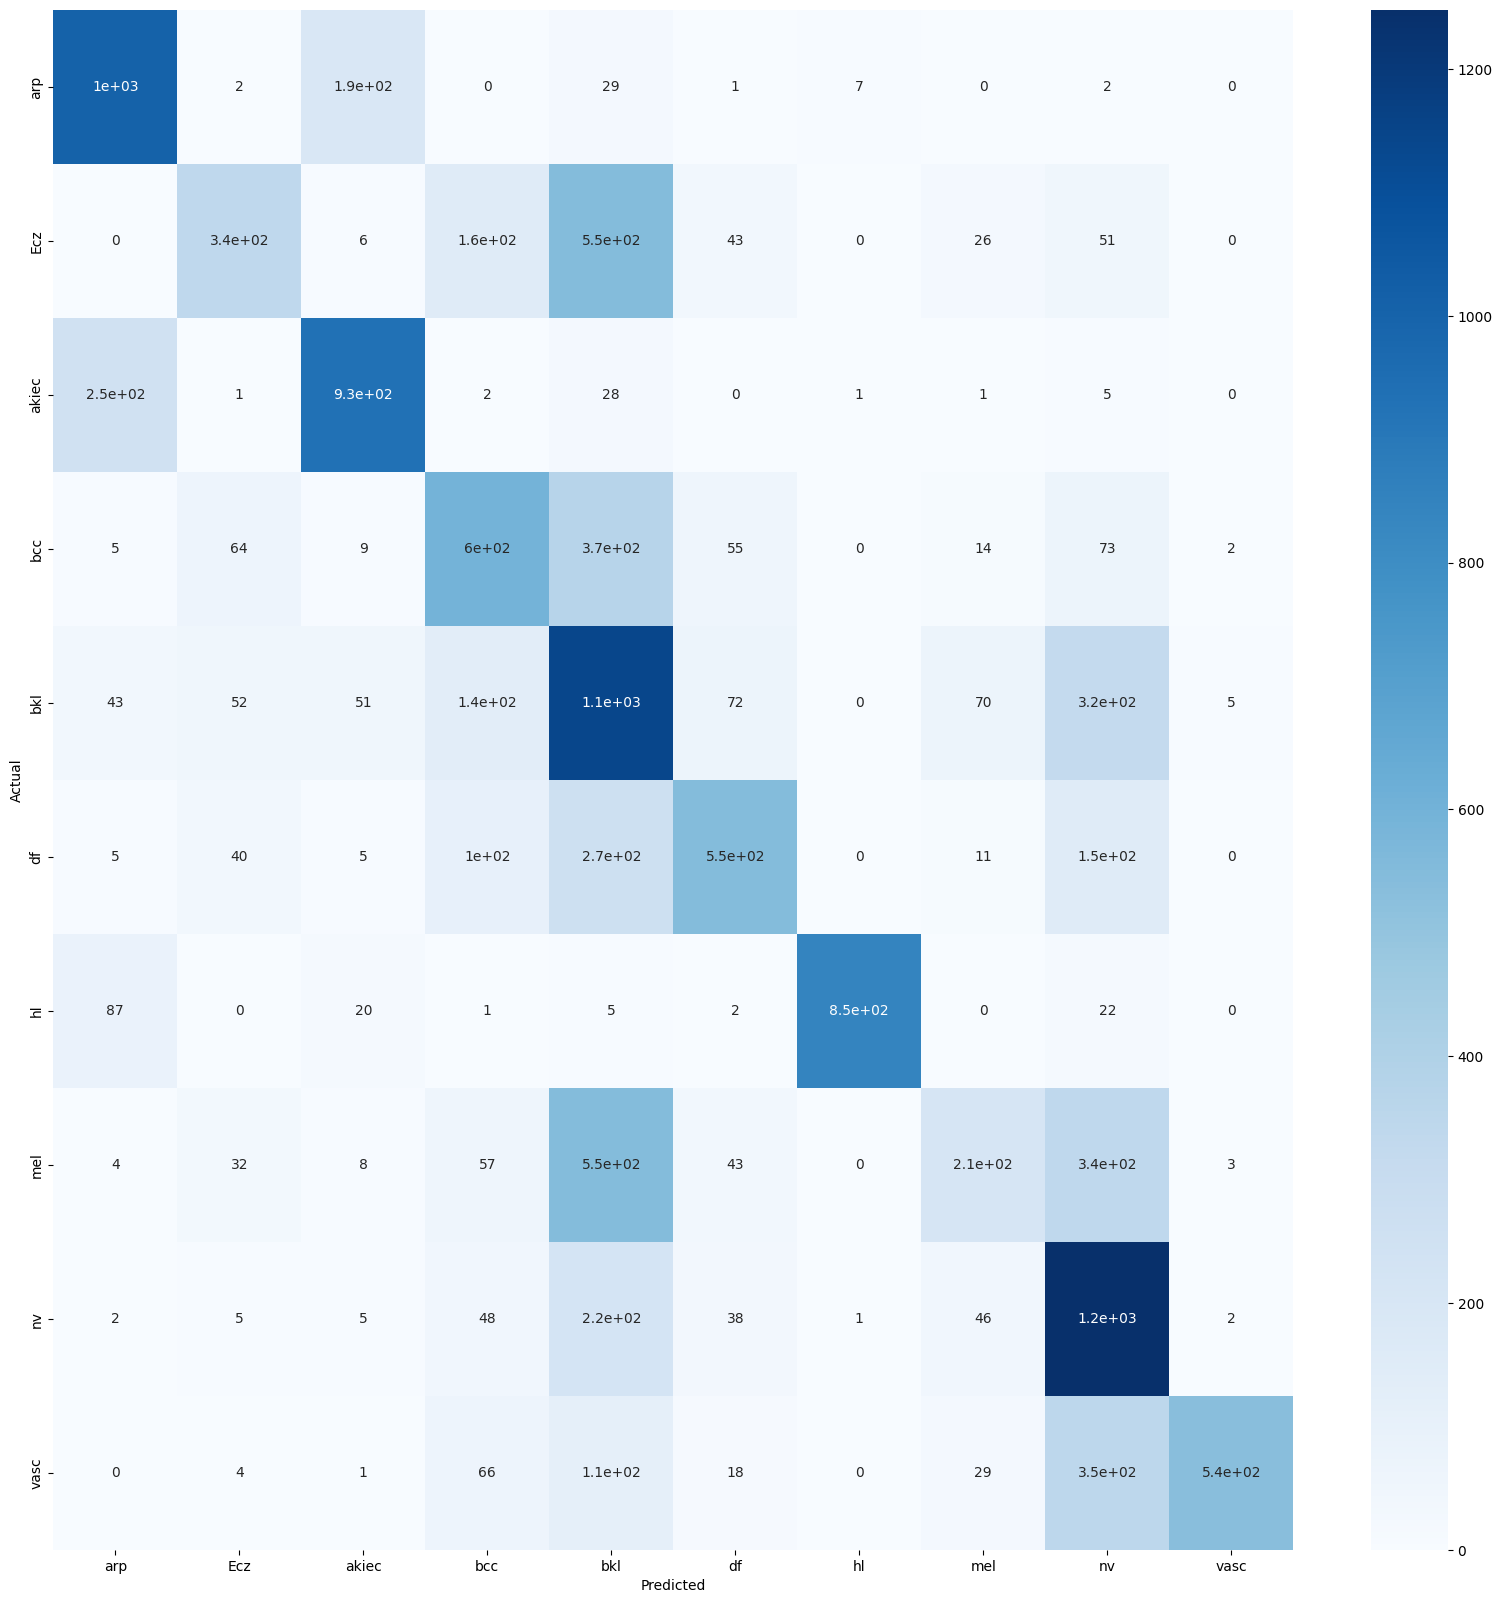

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
count=0
# models="../models/tflite/model_v7_vgg_tf_augmented_12d_60acc.tflite"
predictions = []
actuals = []


for images, labels in dataset.take(800):
    for i in range(len(images)):
        predicted_class, confidence = predict(model, images[i].numpy())
        count += 1
        print(count)
        actual_class = [j for j, x in enumerate(labels[i]) if x == 1][0]
        actual_class = class_names[actual_class] 
        predictions.append(predicted_class)
        actuals.append(actual_class)
        
        
conf_matrix = confusion_matrix(actuals, predictions)

plt.figure(figsize=(20, 20)) # Increase the size of the heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
len(predictions)
len(actuals)

12799

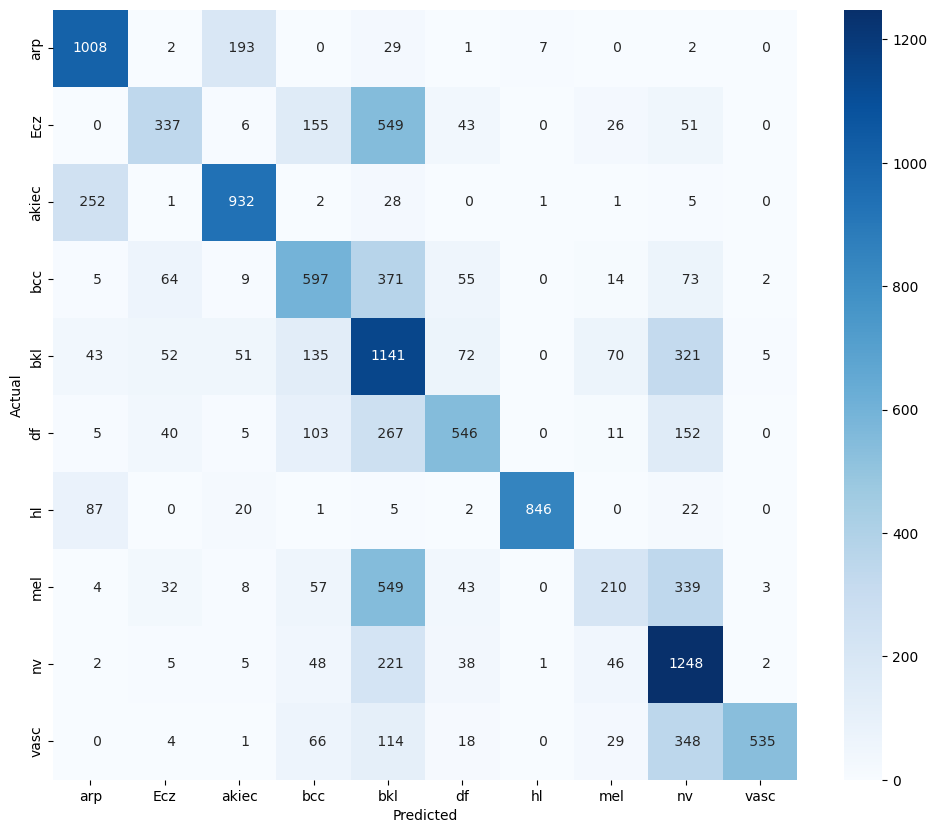

In [17]:
plt.figure(figsize=(12, 10)) # Increase the size of the heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt='4', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
conf_matrix


array([[571,   7, 609,   3,   3,   1,  36,   3,   0,  10],
       [189, 399, 441,  77,   8,   7,   6,  20,  16,   6],
       [305,  21, 885,   1,   1,   3,   8,   0,   1,   1],
       [181, 323, 452, 117,  15,   3,   7,  24,  33,  34],
       [357, 302, 800, 152,  59,   5,  15,  80,  77,  47],
       [142, 233, 359, 176,  29,  24,   7,  37,  94,  29],
       [151,  89, 443,   2,   0,   4, 242,   0,  47,   4],
       [190, 130, 549, 102,  32,   4,   1, 141,  89,  11],
       [ 87, 264, 400, 160,  37,   7,   3,  91, 492,  75],
       [ 59,  43, 431,  89,   5,   1,   1,  79,  69, 340]], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

In [21]:
import pandas as pd
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,15), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

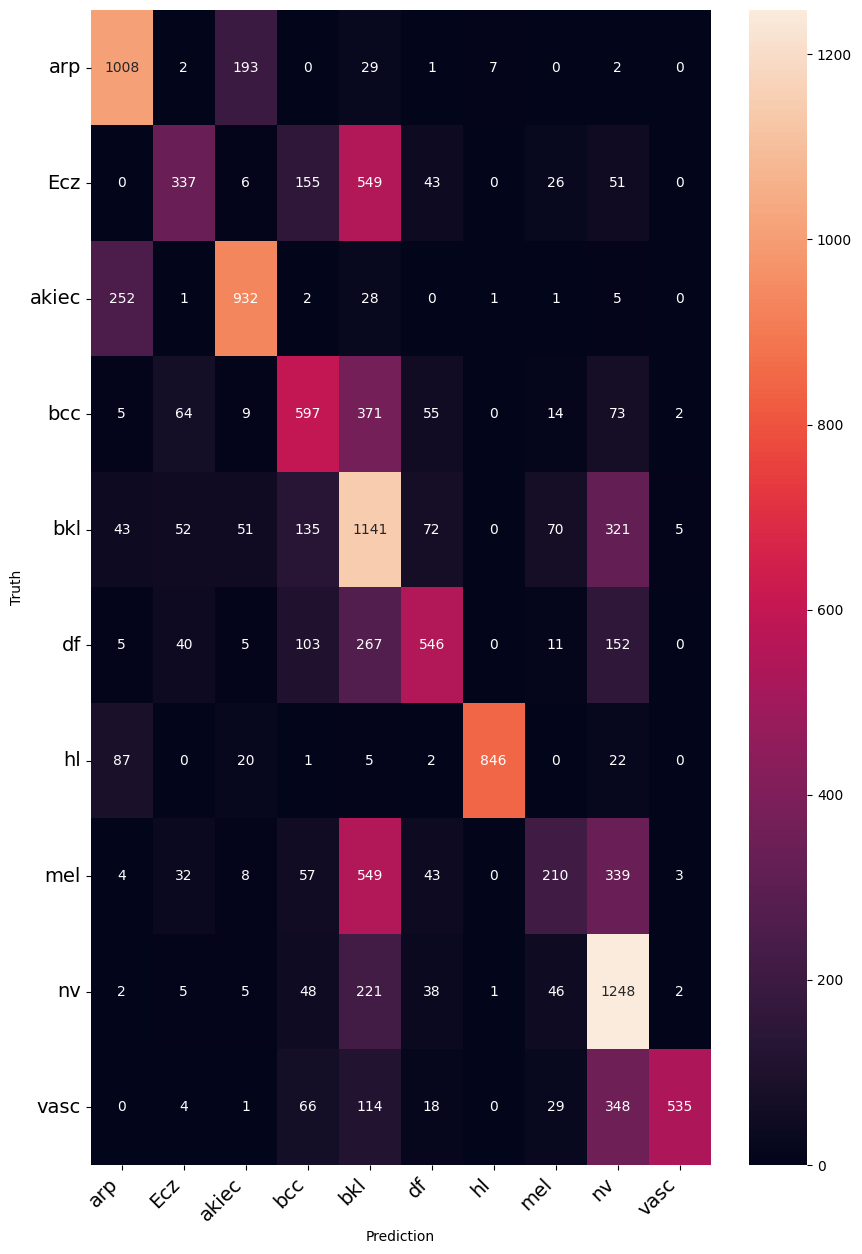

In [22]:
cm = confusion_matrix(actuals,predictions)
print_confusion_matrix(cm,['arp',
 'Ecz',
 'akiec',
 'bcc',
 'bkl',
 'df',
 'hl',
 'mel',
 'nv',
 'vasc'])

In [23]:
print("For VGG19")
print(classification_report(actuals, predictions))

For VGG19
              precision    recall  f1-score   support

         Ecz       0.72      0.81      0.76      1242
       akiec       0.63      0.29      0.40      1167
         arp       0.76      0.76      0.76      1222
         bcc       0.51      0.50      0.51      1190
         bkl       0.35      0.60      0.44      1890
          df       0.67      0.48      0.56      1129
          hl       0.99      0.86      0.92       983
         mel       0.52      0.17      0.25      1245
          nv       0.49      0.77      0.60      1616
        vasc       0.98      0.48      0.64      1115

    accuracy                           0.58     12799
   macro avg       0.66      0.57      0.58     12799
weighted avg       0.63      0.58      0.57     12799

